In [1]:
# Install Poppler
!apt-get update -qq
!apt-get install -y poppler-utils

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpoppler-dev libpoppler-private-dev libpoppler118
The following NEW packages will be installed:
  poppler-utils
The following packages will be upgraded:
  libpoppler-dev libpoppler-private-dev libpoppler118
3 upgraded, 1 newly installed, 0 to remove and 152 not upgraded.
Need to get 1,462 kB of archives.
After this operation, 700 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-private-dev amd64 22.02.0-2ubuntu0.8 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-dev amd64 22.02.0-2ubuntu0.8 [5,186 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-upd

In [2]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from pdf2image import convert_from_path
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

2025-05-03 20:53:50.700890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746305630.947942      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746305631.017556      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-detection")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2400: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2400: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2400: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

TableTransformerForObjectDetection(
  (model): TableTransformerModel(
    (backbone): TableTransformerConvModel(
      (conv_encoder): TableTransformerConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): TableTransformerFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): TableTransformerFrozenBatchNorm2d()
              (drop_block): Identity()
              (act1): ReLU(inplace=True)
              (aa): Identity()
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): TableTransformerFrozenBatchNorm2d()
              (act2): ReLU(inplac

In [4]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 152 not upgraded.


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



── Processing Page 1/11 ──


Saved JSON: ./outputs/page_1_tables.json

── Processing Page 2/11 ──


Saved JSON: ./outputs/page_2_tables.json

── Processing Page 3/11 ──


Saved JSON: ./outputs/page_3_tables.json

── Processing Page 4/11 ──


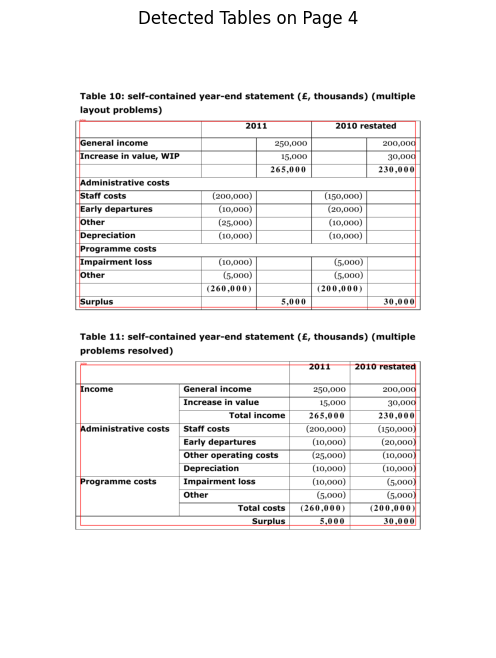

Saved JSON: ./outputs/page_4_tables.json

── Processing Page 5/11 ──


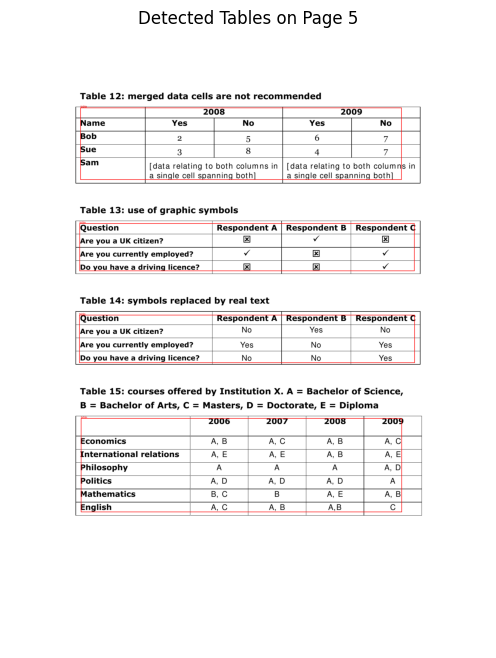

Saved JSON: ./outputs/page_5_tables.json

── Processing Page 6/11 ──


Saved JSON: ./outputs/page_6_tables.json

── Processing Page 7/11 ──


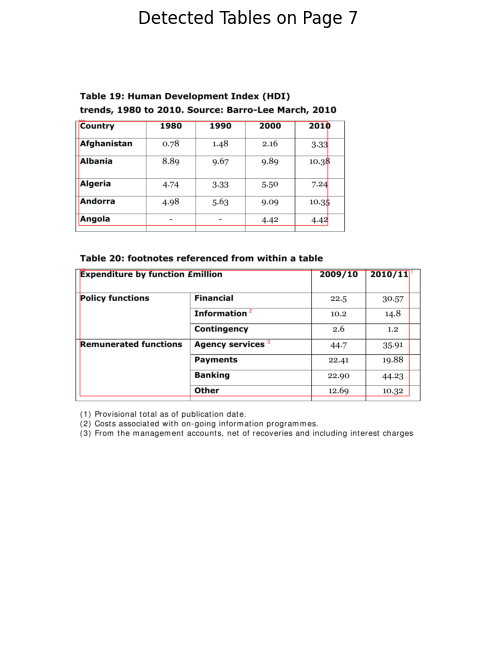

Saved JSON: ./outputs/page_7_tables.json

── Processing Page 8/11 ──


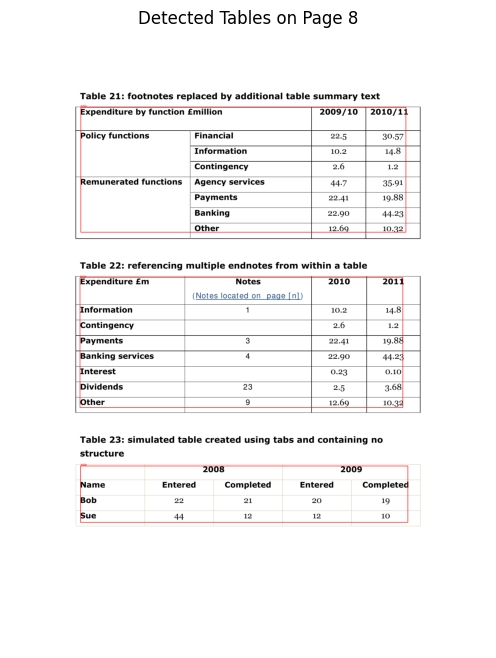

Saved JSON: ./outputs/page_8_tables.json

── Processing Page 9/11 ──


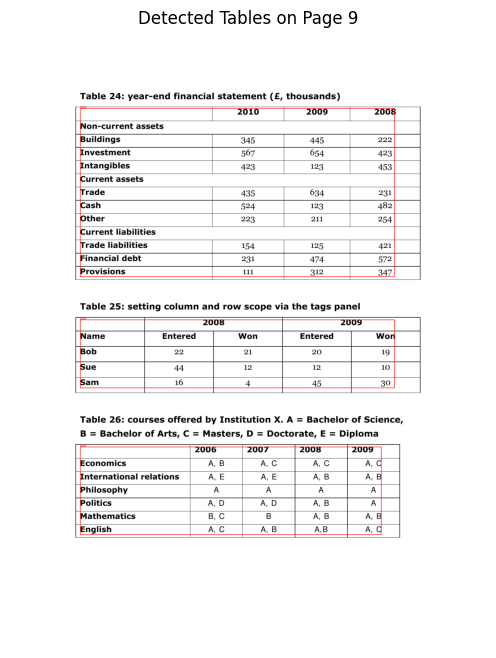

Saved JSON: ./outputs/page_9_tables.json

── Processing Page 10/11 ──


Saved JSON: ./outputs/page_10_tables.json

── Processing Page 11/11 ──


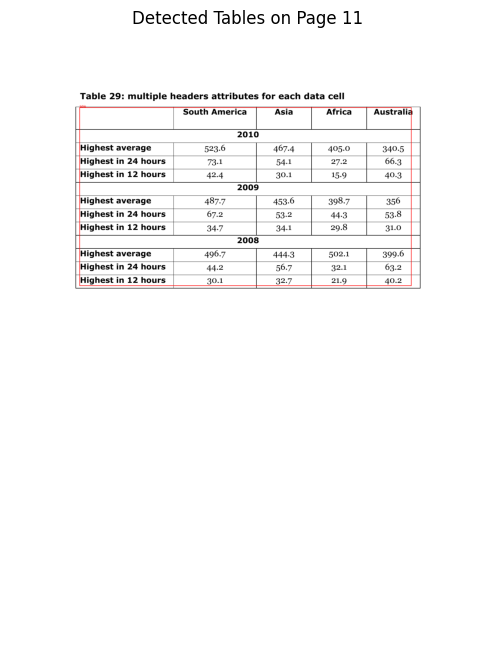

Saved JSON: ./outputs/page_11_tables.json


In [5]:
import os
import json
import torch
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from PIL import Image, ImageDraw
from IPython.display import display, HTML
from transformers import AutoImageProcessor, AutoModelForObjectDetection

# ── Configuration ──────────────────────────────────────────────────────────────
PDF_PATH      = "/kaggle/input/tables/sample-tables.pdf"
OUTPUT_DIR    = "./outputs"
CONF_THRES    = 0.7   # detection confidence threshold
DPI           = 200   # resolution for PDF→image

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ── 1. Load Table Transformer ──────────────────────────────────────────────────
processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model     = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-detection")
device    = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# ── 2. PDF → Images ─────────────────────────────────────────────────────────────
def pdf_to_images(pdf_path, dpi=DPI):
    try:
        return convert_from_path(pdf_path, dpi=dpi)
    except Exception as e:
        raise RuntimeError(f"Failed to convert PDF → images: {e}")

# ── 3. Detect Tables ────────────────────────────────────────────────────────────
def detect_tables(img):
    inputs = processor(images=img, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    target_sizes = torch.tensor([img.size[::-1]]).to(device)
    results = processor.post_process_object_detection(
        outputs, target_sizes=target_sizes, threshold=CONF_THRES
    )[0]
    return results

# ── 4. Generate HTML ───────────────────────────────────────────────────────────
def tables_to_html(results):
    html = "<table border='1' style='border-collapse:collapse;'>"
    html += "<tr><th>Index</th><th>Label</th><th>Score</th><th>Box [x1,y1,x2,y2]</th></tr>"
    for idx, (label, score, box) in enumerate(zip(results["labels"], results["scores"], results["boxes"])):
        html += (
            f"<tr>"
            f"<td>{idx}</td>"
            f"<td>{model.config.id2label[label.item()]}</td>"
            f"<td>{score:.3f}</td>"
            f"<td>{[round(x,2) for x in box.tolist()]}</td>"
            f"</tr>"
        )
    html += "</table>"
    return html

# ── 5. Draw & Display ───────────────────────────────────────────────────────────
def draw_boxes(img, results):
    img_boxed = img.copy()
    draw = ImageDraw.Draw(img_boxed)
    for label, box in zip(results["labels"], results["boxes"]):
        box = [round(x,2) for x in box.tolist()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]-10), model.config.id2label[label.item()], fill="red")
    return img_boxed

# ── 6. Save JSON ────────────────────────────────────────────────────────────────
def save_json(page_idx, results):
    data = []
    for label, score, box in zip(results["labels"], results["scores"], results["boxes"]):
        data.append({
            "label": model.config.id2label[label.item()],
            "score": float(score),
            "box": [round(x,2) for x in box.tolist()]
        })
    out_path = os.path.join(OUTPUT_DIR, f"page_{page_idx+1}_tables.json")
    with open(out_path, "w") as f:
        json.dump(data, f, indent=2)
    return out_path

# ── 7. Full Pipeline ────────────────────────────────────────────────────────────
images = pdf_to_images(PDF_PATH, dpi=DPI)

for i, page_img in enumerate(images):
    print(f"\n── Processing Page {i+1}/{len(images)} ──")
    
    # 1. Detect
    results = detect_tables(page_img.convert("RGB"))
    
    # 2. Generate & display HTML
    html = tables_to_html(results)
    display(HTML(html))
    
    # 3. Draw boxes & show
    boxed_img = draw_boxes(page_img.convert("RGB"), results)
    plt.figure(figsize=(8,8))
    plt.imshow(boxed_img)
    plt.axis("off")
    plt.title(f"Detected Tables on Page {i+1}")
    plt.show()
    
    # 4. Save JSON
    json_path = save_json(i, results)
    print(f"Saved JSON: {json_path}")

Total tables found: 29


Saved cropped table to: /kaggle/working/croped/table_1_page1.png


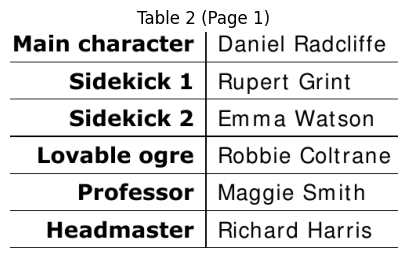

Saved cropped table to: /kaggle/working/croped/table_2_page1.png


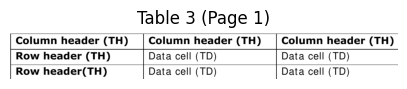

Saved cropped table to: /kaggle/working/croped/table_3_page1.png


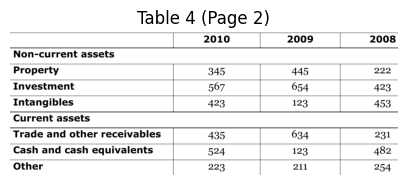

Saved cropped table to: /kaggle/working/croped/table_4_page2.png


Saved cropped table to: /kaggle/working/croped/table_5_page2.png


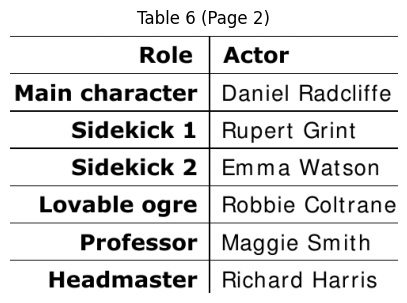

Saved cropped table to: /kaggle/working/croped/table_6_page2.png


Saved cropped table to: /kaggle/working/croped/table_7_page3.png


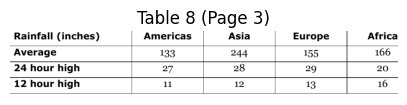

Saved cropped table to: /kaggle/working/croped/table_8_page3.png


Saved cropped table to: /kaggle/working/croped/table_9_page3.png


Saved cropped table to: /kaggle/working/croped/table_10_page4.png


Saved cropped table to: /kaggle/working/croped/table_11_page4.png


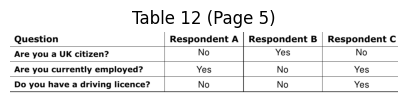

Saved cropped table to: /kaggle/working/croped/table_12_page5.png


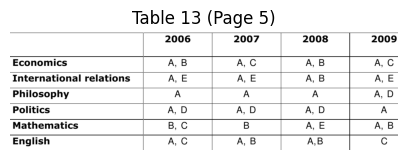

Saved cropped table to: /kaggle/working/croped/table_13_page5.png


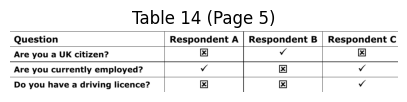

Saved cropped table to: /kaggle/working/croped/table_14_page5.png


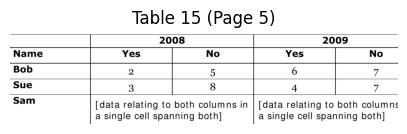

Saved cropped table to: /kaggle/working/croped/table_15_page5.png


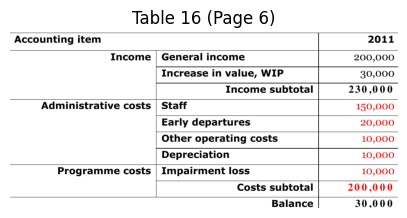

Saved cropped table to: /kaggle/working/croped/table_16_page6.png


Saved cropped table to: /kaggle/working/croped/table_17_page6.png


Saved cropped table to: /kaggle/working/croped/table_18_page6.png


Saved cropped table to: /kaggle/working/croped/table_19_page7.png


Saved cropped table to: /kaggle/working/croped/table_20_page7.png


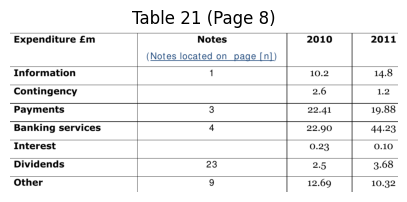

Saved cropped table to: /kaggle/working/croped/table_21_page8.png


Saved cropped table to: /kaggle/working/croped/table_22_page8.png


Saved cropped table to: /kaggle/working/croped/table_23_page8.png


Saved cropped table to: /kaggle/working/croped/table_24_page9.png


Saved cropped table to: /kaggle/working/croped/table_25_page9.png


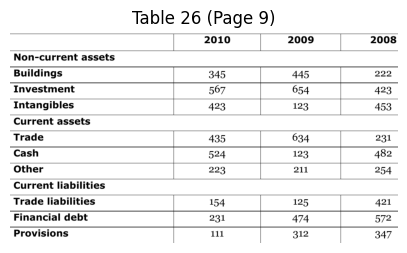

Saved cropped table to: /kaggle/working/croped/table_26_page9.png


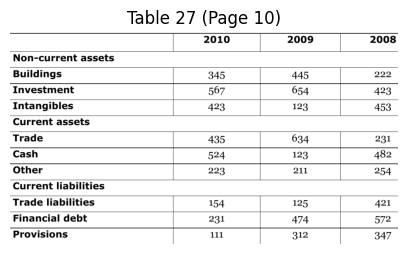

Saved cropped table to: /kaggle/working/croped/table_27_page10.png


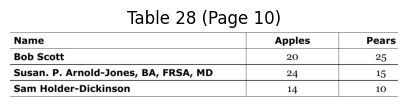

Saved cropped table to: /kaggle/working/croped/table_28_page10.png


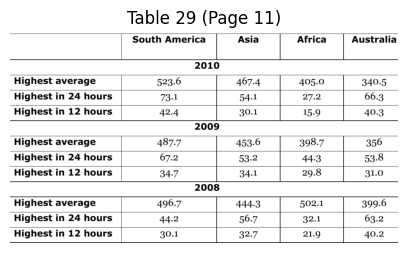

Saved cropped table to: /kaggle/working/croped/table_29_page11.png


In [6]:
import os

SAVE_DIR = "/kaggle/working/croped"
os.makedirs(SAVE_DIR, exist_ok=True)

# 1. Build a flat list of all tables across pages
all_tables = []
for page_idx, page_img in enumerate(images):
    results = detect_tables(page_img.convert("RGB"))
    for table_idx, box in enumerate(results["boxes"]):
        all_tables.append((page_idx, table_idx, box))

print(f"Total tables found: {len(all_tables)}")

# 2. Crop, display, and save each table with added padding
padding = 10  # Adjust this value for more or less space

for global_idx, (page_idx, table_idx, box) in enumerate(all_tables):
    img = images[page_idx]
    x1, y1, x2, y2 = map(int, box.tolist())

    # Add padding around the box
    x1 = max(0, x1 - padding)  # Ensure x1 doesn't go below 0
    y1 = max(0, y1 - padding)  # Ensure y1 doesn't go below 0
    x2 = min(img.width, x2 + padding)  # Ensure x2 doesn't go out of the image width
    y2 = min(img.height, y2 + padding)  # Ensure y2 doesn't go out of the image height
    
    cropped = img.crop((x1, y1, x2, y2))
    
    # Display the cropped table
    plt.figure(figsize=(5,5))
    plt.imshow(cropped)
    plt.axis("off")
    plt.title(f"Table {global_idx+1} (Page {page_idx+1})")
    plt.show()
    
    # Save the cropped image
    save_path = os.path.join(SAVE_DIR, f"table_{global_idx+1}_page{page_idx+1}.png")
    cropped.save(save_path)
    print(f"Saved cropped table to: {save_path}")

In [7]:
!pip install transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [8]:
# # 1) Install dependencies (if you haven’t already)
# !pip install -q opencv-python-headless pytesseract beautifulsoup4

# # 2) Imports
# import os
# from glob import glob
# from PIL import Image
# import cv2
# import numpy as np
# import pytesseract
# from bs4 import BeautifulSoup as bs
# from IPython.display import display, HTML, Image as IPImage

# # 3) Detect table cell boxes via morphological line detection
# def detect_table_cells(img_path):
#     img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     _, bw = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

#     # horizontal lines
#     horiz_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (bw.shape[1]//15, 1))
#     horiz = cv2.morphologyEx(bw, cv2.MORPH_OPEN, horiz_kernel)

#     # vertical lines
#     vert_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, bw.shape[0]//15))
#     vert = cv2.morphologyEx(bw, cv2.MORPH_OPEN, vert_kernel)

#     # grid = intersection of horiz and vert
#     grid = cv2.add(horiz, vert)

#     # find contours on the grid
#     contours, _ = cv2.findContours(grid, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     boxes = [cv2.boundingRect(c) for c in contours]
#     # filter out tiny boxes
#     boxes = [b for b in boxes if b[2] > 20 and b[3] > 20]
#     # sort top-to-bottom, then left-to-right
#     boxes = sorted(boxes, key=lambda b: (b[1], b[0]))
#     return boxes

# # 4) OCR one cell
# def ocr_cell(img_gray, box):
#     x, y, w, h = box
#     crop = img_gray[y:y+h, x:x+w]
#     return pytesseract.image_to_string(crop, config="--psm 6").strip()

# # 5) Convert image → HTML table
# def image_to_html_table(img_path):
#     # load & show grayscale for OCR, and PIL for resizing display
#     pil = Image.open(img_path).convert("RGB")
#     img_gray = cv2.cvtColor(np.array(pil), cv2.COLOR_RGB2GRAY)

#     # detect all cell boxes
#     boxes = detect_table_cells(img_path)
#     if not boxes:
#         return "<p><em>No table cells detected.</em></p>"

#     # group into rows:
#     rows = []
#     row_tol = 15
#     for box in boxes:
#         x, y, w, h = box
#         if not rows:
#             rows.append([box])
#         else:
#             # compare to first box in last row
#             _, y0, _, _ = rows[-1][0]
#             if abs(y - y0) <= row_tol:
#                 rows[-1].append(box)
#             else:
#                 rows.append([box])

#     # sort each row’s boxes left to right
#     rows = [sorted(r, key=lambda b: b[0]) for r in rows]

#     # OCR each cell
#     table = []
#     for r in rows:
#         row_texts = [ocr_cell(img_gray, b) for b in r]
#         table.append(row_texts)

#     # build HTML
#     html = "<table border='1' style='border-collapse:collapse;'>\n"
#     for r in table:
#         html += "  <tr>\n"
#         for cell in r:
#             html += f"    <td>{cell}</td>\n"
#         html += "  </tr>\n"
#     html += "</table>"

#     # prettify
#     return bs(html, "html.parser").prettify()

# # 6) Run on all your PNGs
# image_folder = "/kaggle/working/croped"
# for path in sorted(glob(os.path.join(image_folder, "*.png"))):
#     print(f"\n📄 {os.path.basename(path)}")
#     display(IPImage(path, width=400))
#     html = image_to_html_table(path)
#     print(html)
#     display(HTML(html))



Processing: table_10_page4.png


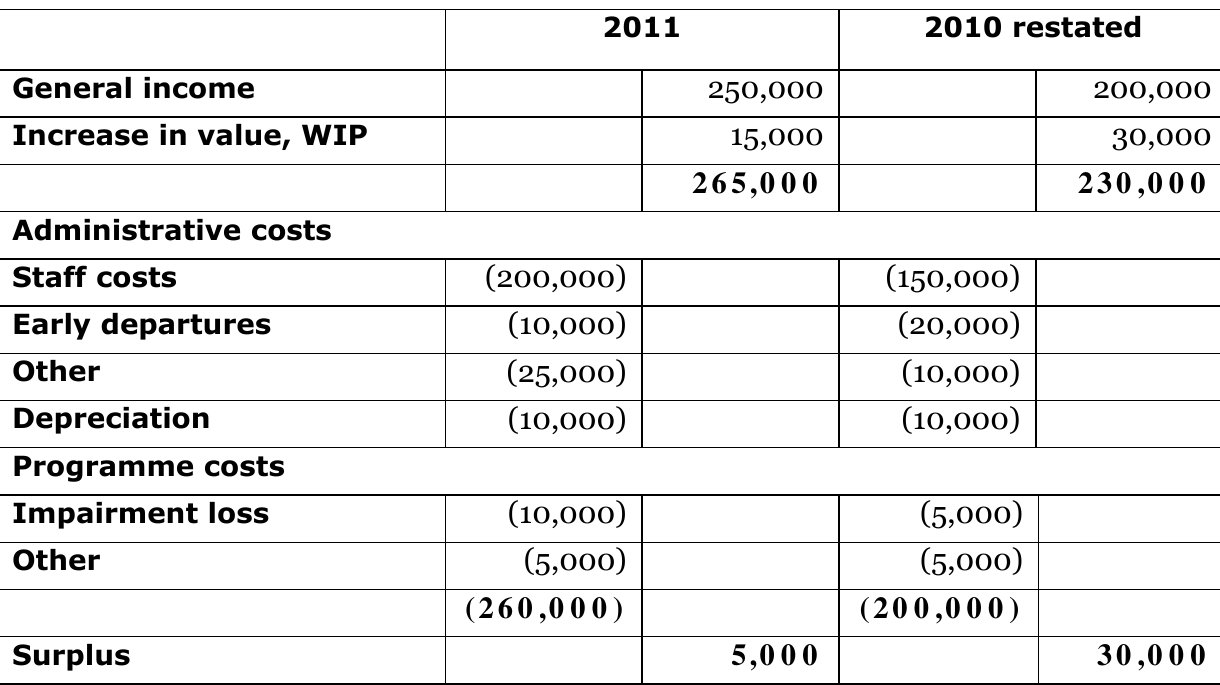

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   restated
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   250,000
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
   Increase
  </td>
  <td>
   in
  </td>
  <td>
   value,
  </td>
  <td>
  </td>
  <td>
   WIP
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   15,000
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   265,000
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
   Administrative
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   costs
 


Processing: table_11_page4.png


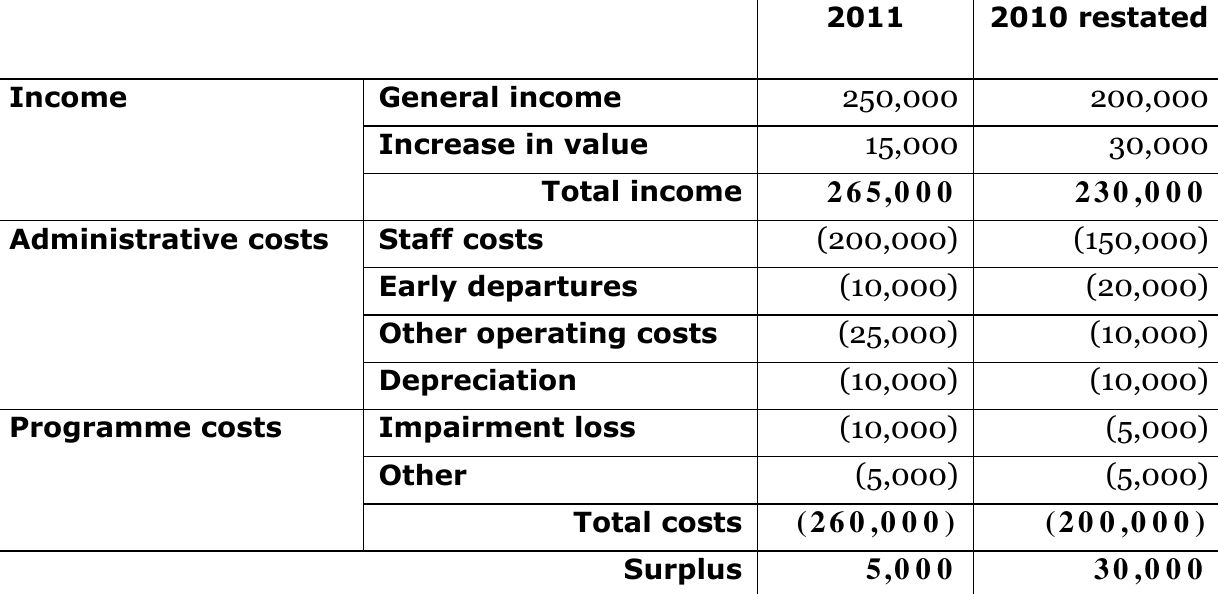

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
  <td>
   2010
  </td>
  <td>
   restated
  </td>
 </tr>
 <tr>
  <td>
   Income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
   250,000
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Increase
  </td>
  <td>
   invalue
  </td>
  <td>
  </td>
  <td>
   15,000
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Total
  </td>
  <td>
   income
  </td>
  <td>
   265,000
  </td>
  <td>
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Administrative
  </td>
  <td>
  </td>



Processing: table_12_page5.png


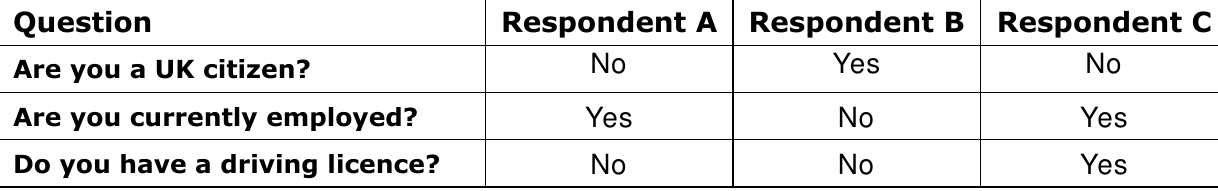

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Question
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Respondent
  </td>
  <td>
   A|
  </td>
  <td>
   Respondent
  </td>
  <td>
   B|
  </td>
  <td>
   Respondent
  </td>
  <td>
   C
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   aUK
  </td>
  <td>
   citizen?
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   currently
  </td>
  <td>
  </td>
  <td>
   employed?
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Do
  </td>
  <td>
   you
  </td>
  <td>
   havea
  </td>
  <td>
   driving
  </td>
  <td>
  </td>
  <td>
   licence?
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>



Processing: table_13_page5.png


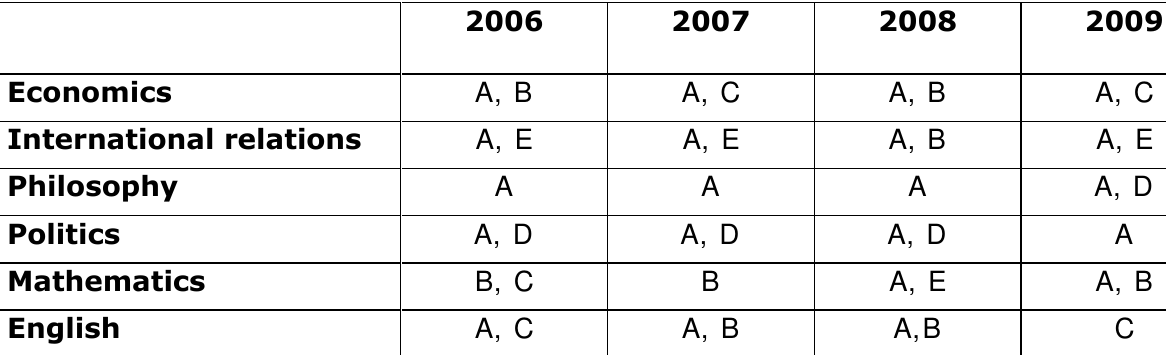

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2006
  </td>
  <td>
   2007
  </td>
  <td>
   2008
  </td>
  <td>
   2009
  </td>
 </tr>
 <tr>
  <td>
   Economics
  </td>
  <td>
  </td>
  <td>
   A,B
  </td>
  <td>
   A,C
  </td>
  <td>
   A,B
  </td>
  <td>
   A,C
  </td>
 </tr>
 <tr>
  <td>
   International
  </td>
  <td>
   relations
  </td>
  <td>
   A,E
  </td>
  <td>
   A,E
  </td>
  <td>
   A,B
  </td>
  <td>
   A,E
  </td>
 </tr>
 <tr>
  <td>
   Philosophy
  </td>
  <td>
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A,D
  </td>
 </tr>
 <tr>
  <td>
   Politics
  </td>
  <td>
  </td>
  <td>
   A,D
  </td>
  <td>
   A,D
  </td>
  <td>
   A,D
  </td>
  <td>
   A
  </td>
 </tr>
 <tr>
  <td>
   Mathematics
  </td>
  <td>
  </td>
  <td>
   B,C
  </td>
  <td>
   B
  </td>
  <td>
   A,E
  </td>
  <td>
   A,B
  </td>
 </tr>
 <tr>
  <td>
   English
  </td>
  <td>
  </td>
  <td>
   A,C
  </td>
  <td>
   A,B


Processing: table_14_page5.png


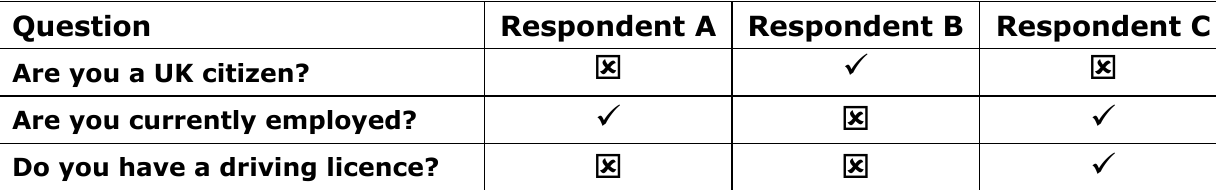

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Question
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Respondent
  </td>
  <td>
   A|
  </td>
  <td>
   Respondent
  </td>
  <td>
   B|
  </td>
  <td>
   Respondent
  </td>
  <td>
   C
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   aUK
  </td>
  <td>
   citizen?
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   v
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   currently
  </td>
  <td>
  </td>
  <td>
   employed?
  </td>
  <td>
  </td>
  <td>
   v
  </td>
  <td>
  </td>
  <td>
   [x]
  </td>
  <td>
  </td>
  <td>
   v
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Do
  </td>
  <td>
   you
  </td>
  <td>
   havea
  </td>
  <td>
   driving
  </td>
  <td>
  </td>
  <td>
   licence?
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   [x]
  </td>
  <td>
 


Processing: table_15_page5.png


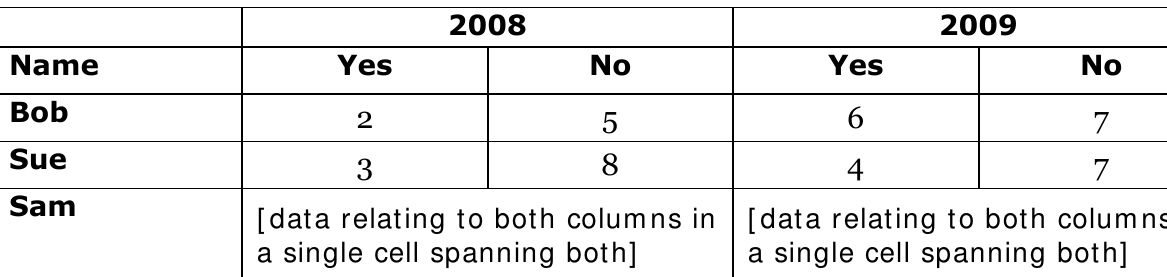

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2008
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Name
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
  </td>
  <td>
   2
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   5
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   6
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   7
  </td>
 </tr>
 <tr>
  <td>
   Sue
  </td>
  <td>
  </td>
  <td>
   3
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   8
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   4
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   7
  </td>
 </tr>
 <tr>
  <td>
   Sam
  </td>
  <td>
   [data
  </td>
  <td>
   relating


Processing: table_16_page6.png


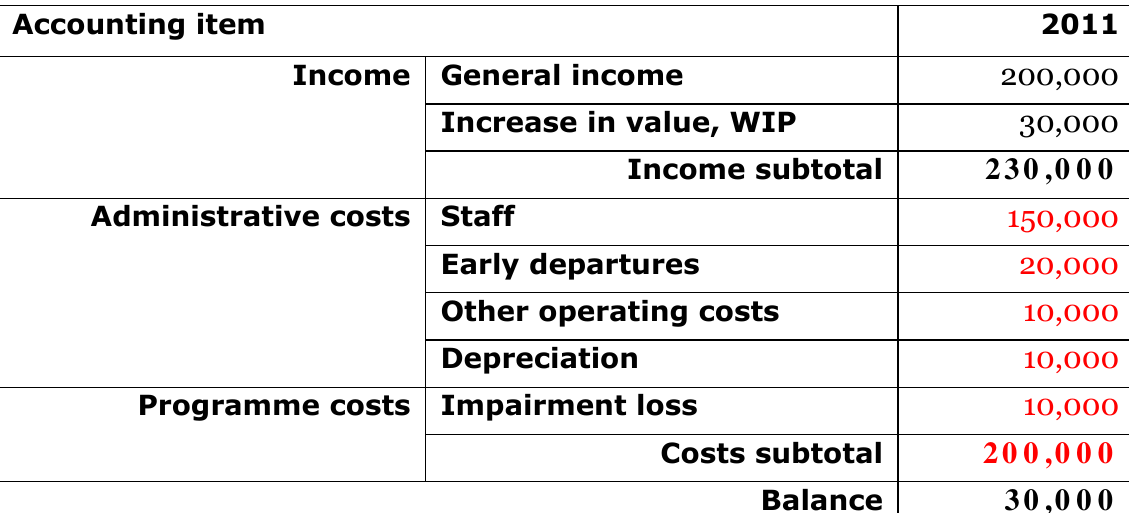

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Accounting
  </td>
  <td>
   item
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
   |
  </td>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Increase
  </td>
  <td>
   in
  </td>
  <td>
   value,
  </td>
  <td>
   WIP
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
  </td>
  <td>
   subtotal
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Administrative
  </td>
  <td>
   costs
  </td>
  <td>
   |
  </td>
  <td>
   Staff
  </td>
  <td>
  </td>
  


Processing: table_17_page6.png


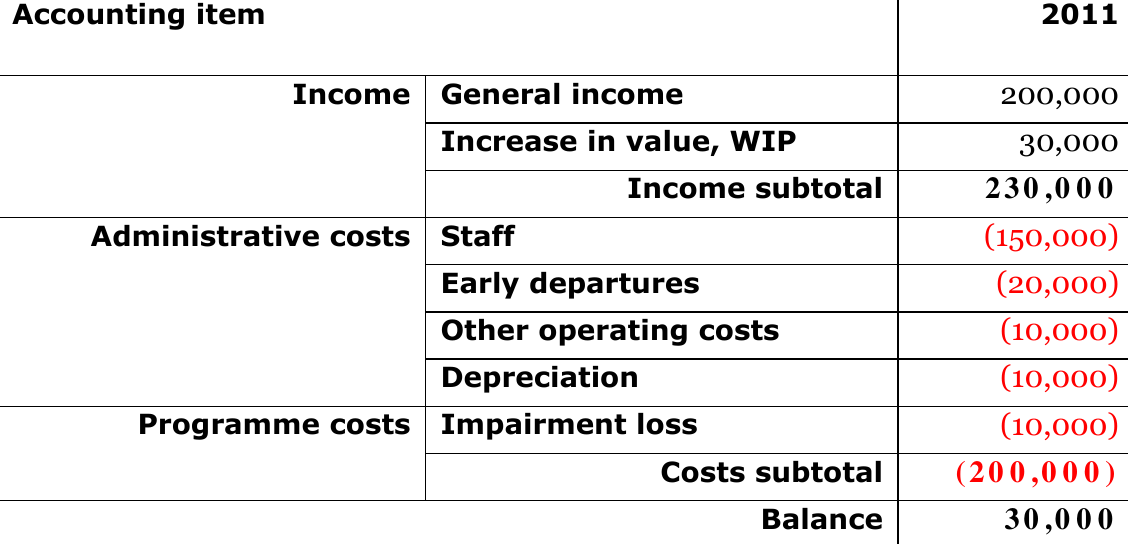

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Accounting
  </td>
  <td>
   item
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
   |
  </td>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Increase
  </td>
  <td>
   in
  </td>
  <td>
   value,
  </td>
  <td>
   WIP
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
  </td>
  <td>
   subtotal
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Administrative
  </td>
  <td>
   costs
  </td>
  <td>
   |
  </td>
  <td>
   Staff
  </td>
  <td>
  </td>
  


Processing: table_18_page6.png


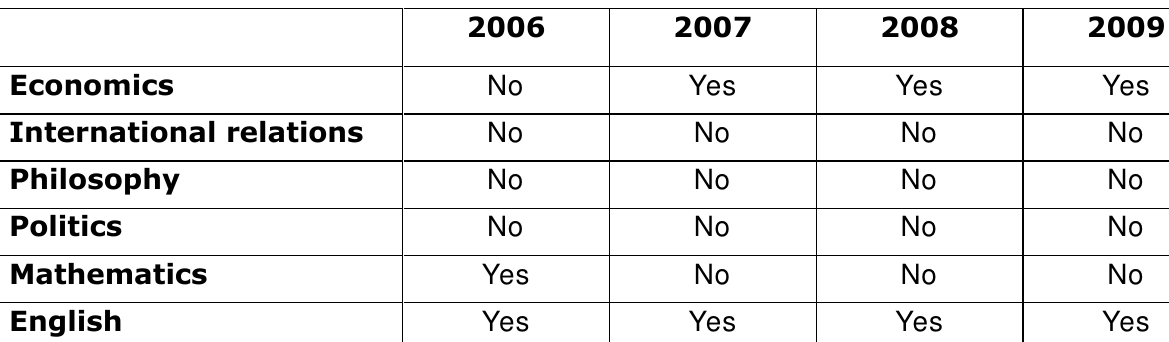

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2006
  </td>
  <td>
   2007
  </td>
  <td>
   2008
  </td>
  <td>
   2009
  </td>
 </tr>
 <tr>
  <td>
   Economics
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
   Yes
  </td>
  <td>
   Yes
  </td>
  <td>
   Yes
  </td>
 </tr>
 <tr>
  <td>
   International
  </td>
  <td>
   relations
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Philosophy
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Politics
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Mathematics
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   English
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
   Yes
  </t


Processing: table_19_page7.png


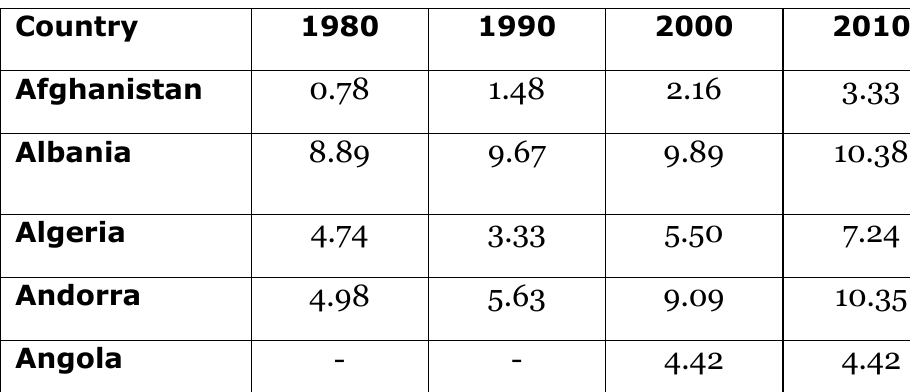

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Country
  </td>
  <td>
   1980
  </td>
  <td>
   1990
  </td>
  <td>
   2000
  </td>
  <td>
   2010
  </td>
 </tr>
 <tr>
  <td>
   Afghanistan
  </td>
  <td>
   0.78
  </td>
  <td>
   1.48
  </td>
  <td>
   2.16
  </td>
  <td>
   3.33
  </td>
 </tr>
 <tr>
  <td>
   Albania
  </td>
  <td>
   8.89
  </td>
  <td>
   9.67
  </td>
  <td>
   9.89
  </td>
  <td>
   10.38
  </td>
 </tr>
 <tr>
  <td>
   Algeria
  </td>
  <td>
   4.74
  </td>
  <td>
   3.33,
  </td>
  <td>
   5.50
  </td>
  <td>
   7.24
  </td>
 </tr>
 <tr>
  <td>
   Andorra
  </td>
  <td>
   4.98
  </td>
  <td>
   5.63
  </td>
  <td>
   9.09
  </td>
  <td>
   10.35
  </td>
 </tr>
 <tr>
  <td>
   Angola
  </td>
  <td>
   -
  </td>
  <td>
   -
  </td>
  <td>
   4.42
  </td>
  <td>
   4.42
  </td>
 </tr>
</table>




Processing: table_1_page1.png


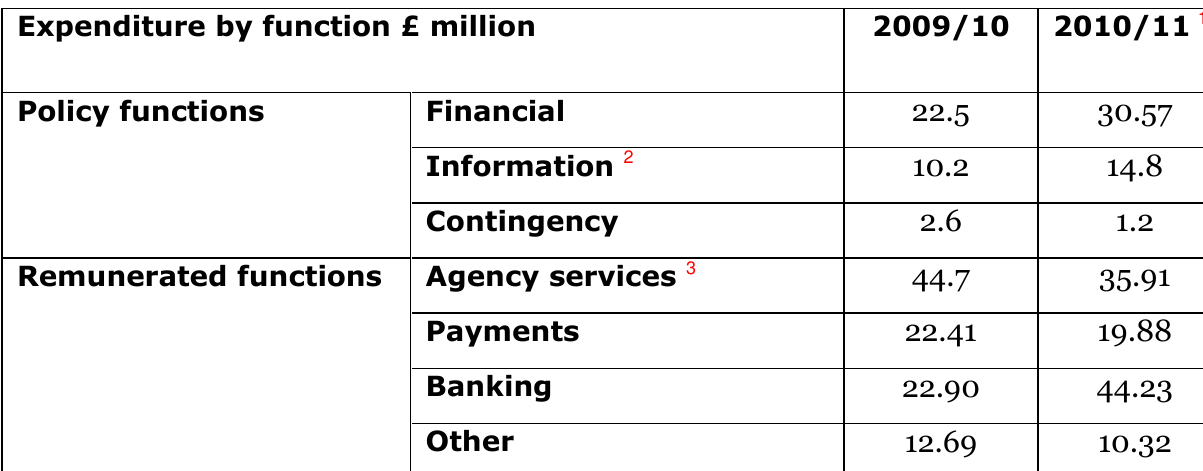

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Expenditure
  </td>
  <td>
  </td>
  <td>
   by
  </td>
  <td>
   function
  </td>
  <td>
   £
  </td>
  <td>
   million
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009/10
  </td>
  <td>
   |
  </td>
  <td>
   2010/11
  </td>
 </tr>
 <tr>
  <td>
   Policy
  </td>
  <td>
  </td>
  <td>
   functions
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Financial
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   22.5
  </td>
  <td>
  </td>
  <td>
   30.57
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Information
  </td>
  <td>
   *
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
  </td>
  <td>
  


Processing: table_20_page7.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Expenditure
  </td>
  <td>
  </td>
  <td>
   by
  </td>
  <td>
   function
  </td>
  <td>
  </td>
  <td>
   £million
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009/10
  </td>
  <td>
   |
  </td>
  <td>
   2010/11
  </td>
 </tr>
 <tr>
  <td>
   Policy
  </td>
  <td>
  </td>
  <td>
   functions
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Financial
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   22.5
  </td>
  <td>
  </td>
  <td>
   30.57
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Information
  </td>
  <td>
   *
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
  </td>
  <td>
   1.2


Processing: table_21_page8.png


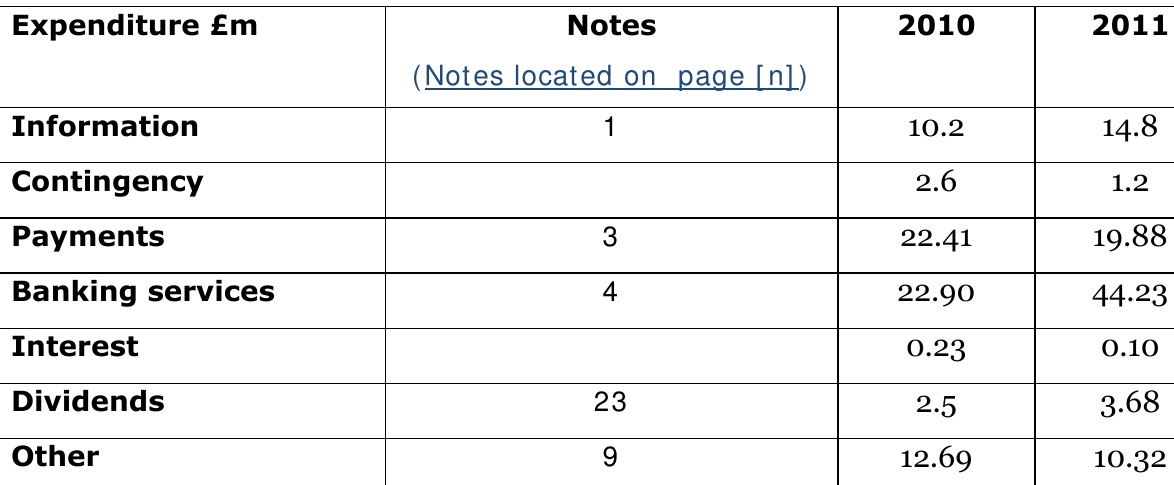

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Expenditure
  </td>
  <td>
   £m
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Notes
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2011
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   (Notes
  </td>
  <td>
   located
  </td>
  <td>
   on
  </td>
  <td>
   page
  </td>
  <td>
   [n])
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Information
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   1
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
   1.2
  </td>
 </tr>
 <tr>
  <td>
   Payments
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   3
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   22.41
  </td>
  <td>
   19.88
  </td>
 </tr>
 <tr>
  <td>
   B


Processing: table_22_page8.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2008
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Name
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Completed
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Completed
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
   22
  </td>
  <td>
  </td>
  <td>
   21
  </td>
  <td>
   20
  </td>
  <td>
  </td>
  <td>
   19
  </td>
 </tr>
 <tr>
  <td>
   Sue
  </td>
  <td>
   44
  </td>
  <td>
  </td>
  <td>
   12
  </td>
  <td>
   12
  </td>
  <td>
  </td>
  <td>
   10
  </td>
 </tr>
</table>




Processing: table_23_page8.png


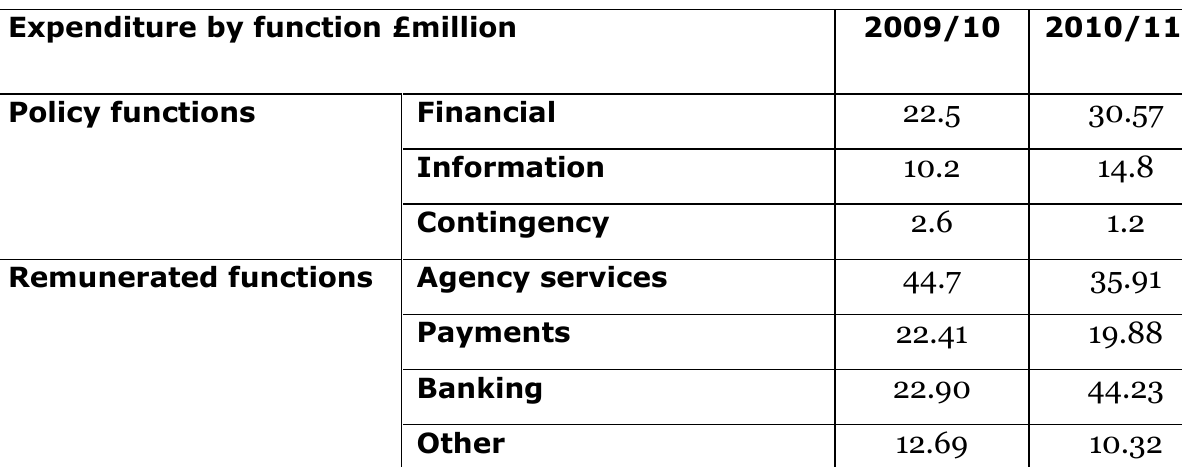

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Expenditure
  </td>
  <td>
  </td>
  <td>
   by
  </td>
  <td>
   function
  </td>
  <td>
  </td>
  <td>
   £million
  </td>
  <td>
  </td>
  <td>
   2009/10
  </td>
  <td>
   |
  </td>
  <td>
   2010/11
  </td>
 </tr>
 <tr>
  <td>
   Policy
  </td>
  <td>
  </td>
  <td>
   functions
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Financial
  </td>
  <td>
  </td>
  <td>
   22.5
  </td>
  <td>
  </td>
  <td>
   30.57
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Information
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
  </td>
  <td>
   1.2
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Remunerated
  </td


Processing: table_24_page9.png


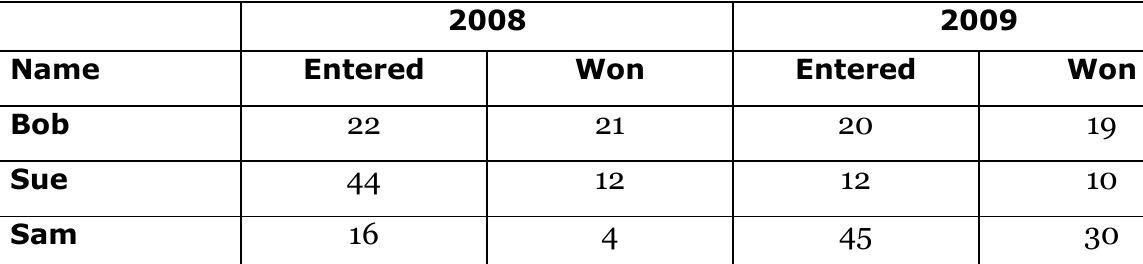

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2008
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Name
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Won
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Won
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
   22
  </td>
  <td>
  </td>
  <td>
   21
  </td>
  <td>
   20
  </td>
  <td>
  </td>
  <td>
   19
  </td>
 </tr>
 <tr>
  <td>
   Sue
  </td>
  <td>
   44
  </td>
  <td>
  </td>
  <td>
   12
  </td>
  <td>
   12
  </td>
  <td>
  </td>
  <td>
   10
  </td>
 </tr>
 <tr>
  <td>
   Sam
  </td>
  <td>
   16
  </td>
  <td>
  </td>
  <td>
   4
  </td>
  <td>
   45
  </td>
  <td>
  </td>
  <td>
   30
  </td>
 </tr>
</table>




Processing: table_25_page9.png


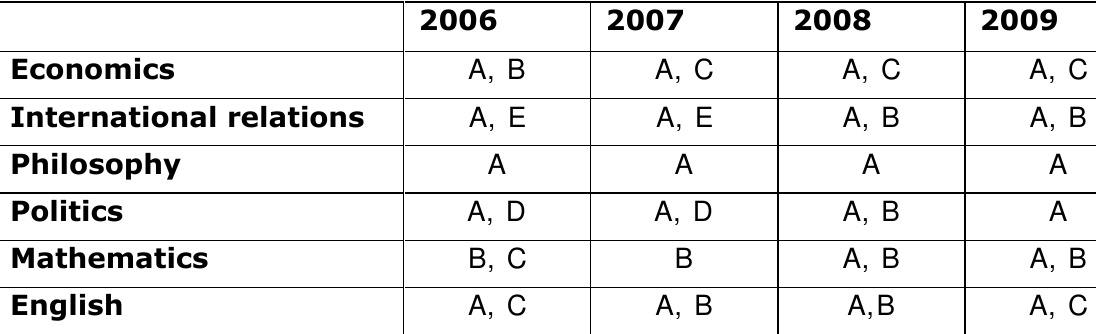

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2006
  </td>
  <td>
   2007
  </td>
  <td>
   2008
  </td>
  <td>
   2009
  </td>
 </tr>
 <tr>
  <td>
   Economics
  </td>
  <td>
  </td>
  <td>
   A,B
  </td>
  <td>
   A,C
  </td>
  <td>
   A,C
  </td>
  <td>
   A,C
  </td>
 </tr>
 <tr>
  <td>
   International
  </td>
  <td>
   relations
  </td>
  <td>
   AVE
  </td>
  <td>
   A,E
  </td>
  <td>
   A,B
  </td>
  <td>
   A,B
  </td>
 </tr>
 <tr>
  <td>
   Philosophy
  </td>
  <td>
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
 </tr>
 <tr>
  <td>
   Politics
  </td>
  <td>
  </td>
  <td>
   A,D
  </td>
  <td>
   A,D
  </td>
  <td>
   A,B
  </td>
  <td>
   A
  </td>
 </tr>
 <tr>
  <td>
   Mathematics
  </td>
  <td>
  </td>
  <td>
   B,C
  </td>
  <td>
   B
  </td>
  <td>
   A,B
  </td>
  <td>
   A,B
  </td>
 </tr>
 <tr>
  <td>
   English
  </td>
  <td>
  </td>
  <td>
   A,C
  </td>
  <td>
   A,B
 


Processing: table_26_page9.png


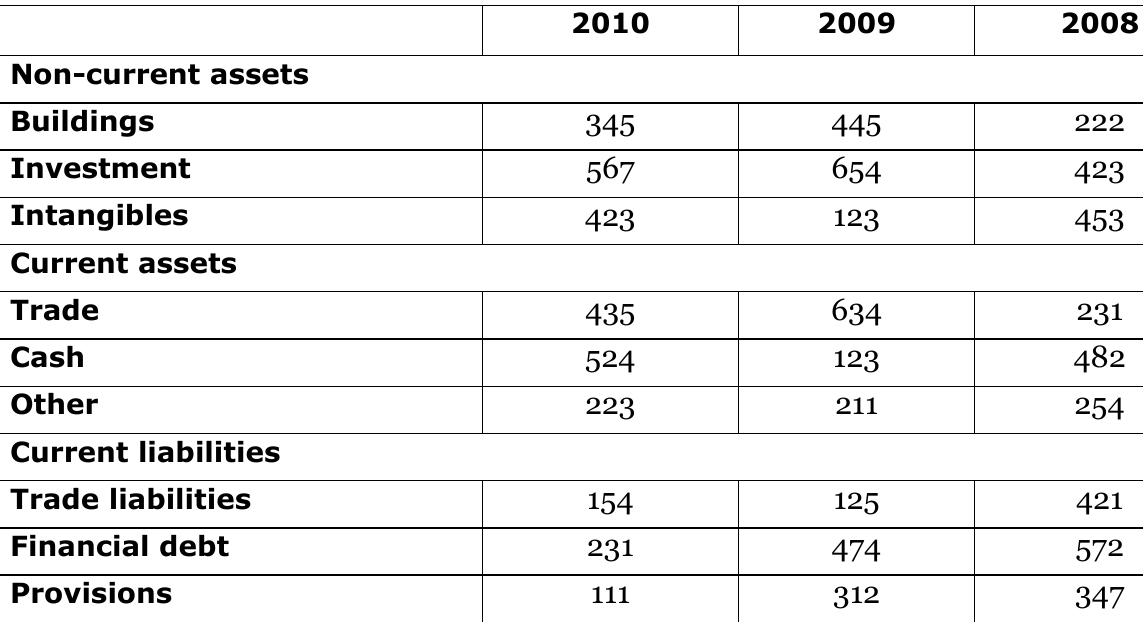

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Non-current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Buildings
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
 <tr>
  <td>
   Current
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Trade
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   435
  </td>
  <td>
   634
  </td>
  <td>
   231
  </td>
 </tr>
 <tr>
  <td>
   Cash


Processing: table_27_page10.png


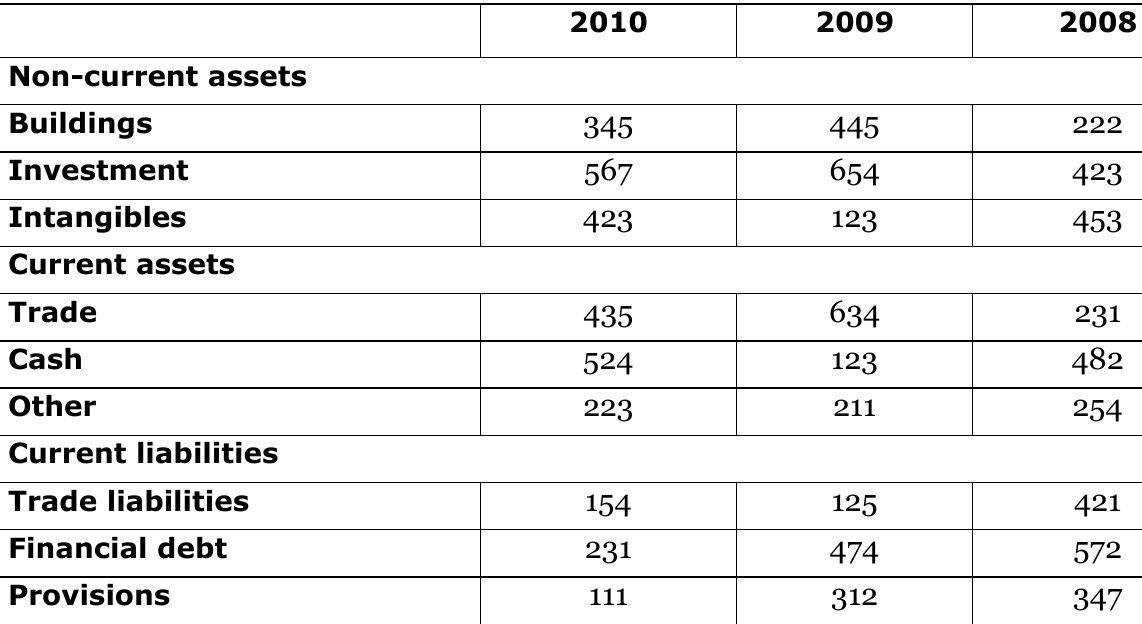

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Non-current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Buildings
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
 <tr>
  <td>
   Current
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Trade
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   435
  </td>
  <td>
   634
  </td>
  <td>
   231
  </td>
 </tr>
 <tr>
  <td>
   Cash


Processing: table_28_page10.png


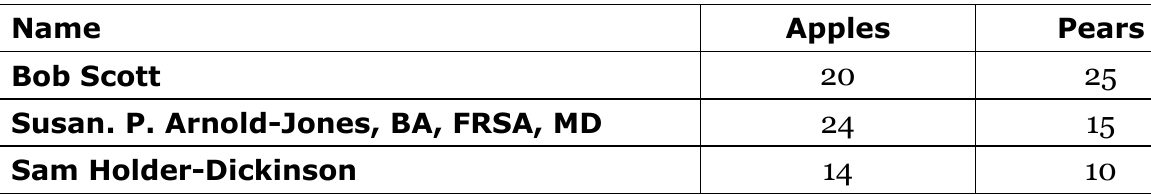

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Name
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Apples
  </td>
  <td>
   Pears
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
   Scott
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   20
  </td>
  <td>
   25
  </td>
 </tr>
 <tr>
  <td>
   Susan.
  </td>
  <td>
   P.
  </td>
  <td>
  </td>
  <td>
   Arnold-Jones,
  </td>
  <td>
   BA,
  </td>
  <td>
   FRSA,
  </td>
  <td>
   MD
  </td>
  <td>
   24
  </td>
  <td>
   15
  </td>
 </tr>
 <tr>
  <td>
   Sam
  </td>
  <td>
  </td>
  <td>
   Holder-Dickinson
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   14
  </td>
  <td>
   10
  </td>
 </tr>
</table>




Processing: table_29_page11.png


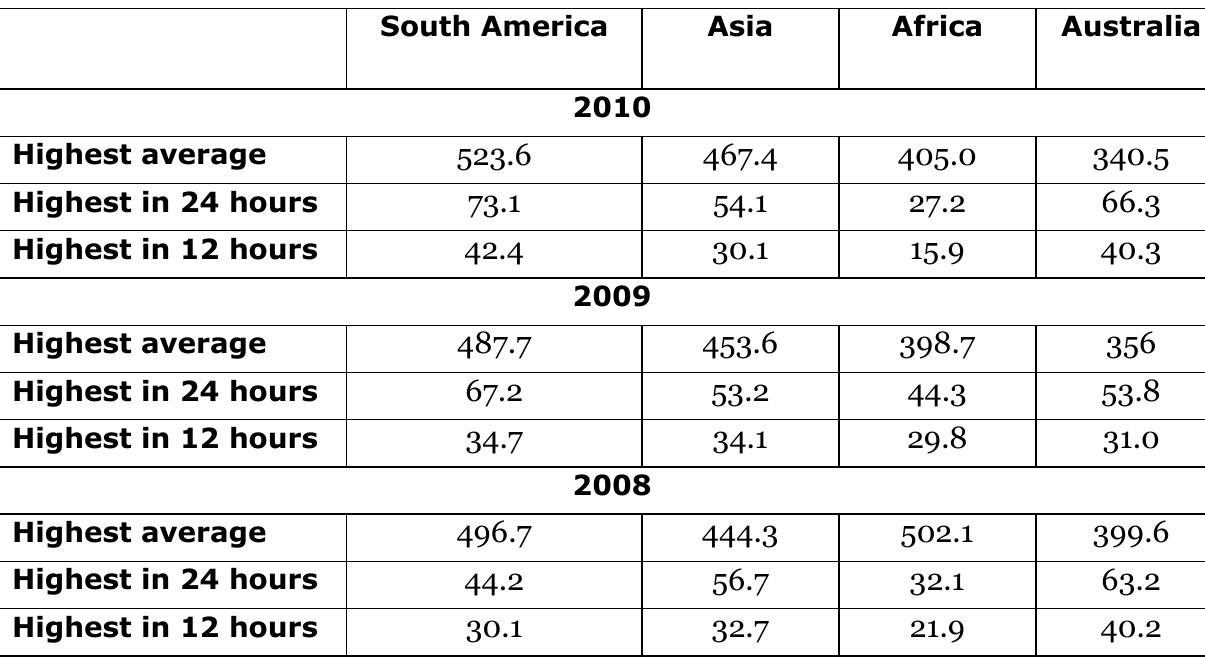

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   South
  </td>
  <td>
  </td>
  <td>
   America
  </td>
  <td>
  </td>
  <td>
   Asia
  </td>
  <td>
   Africa
  </td>
  <td>
   Australia
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Highest
  </td>
  <td>
  </td>
  <td>
   average
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   523.6
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   467.4
  </td>
  <td>
   405.0
  </td>
  <td>
   340.5
  </td>
 </tr>
 <tr>
  <td>
   Highest
  </td>
  <td>
   in
  </td>
  <td>
   24
  </td>
  <td>
   hours
  </td>
  <td>
  </td>
  <td>
   73.1
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   54.1
  </td>
  <td>
   27.2
  </td>
  <td>
   66.3
  </td>
 </tr>
 <tr>
  <td>
   Highest
  </td>
  <td>
   in
  </td>



Processing: table_2_page1.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Main
  </td>
  <td>
  </td>
  <td>
   character
  </td>
  <td>
  </td>
  <td>
   Daniel
  </td>
  <td>
   Radcliffe
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   1
  </td>
  <td>
   Rupert
  </td>
  <td>
   Grint
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   2
  </td>
  <td>
   Emma
  </td>
  <td>
   Watson
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Lovable
  </td>
  <td>
  </td>
  <td>
   ogre
  </td>
  <td>
   Robbie
  </td>
  <td>
   Coltrane
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Professor
  </td>
  <td>
  </td>
  <td>
   Maggie
  </td>
  <td>
   Smith
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Headmaster
  </td>
  <td>
  </td>
  <td>
   Richard
  </td>
  <td>
   Harris
  </td>
 </tr>
</table>




Processing: table_3_page1.png


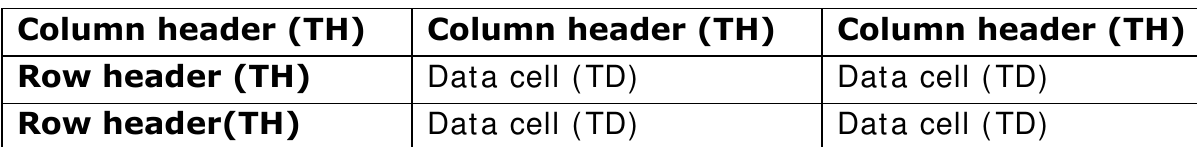

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Column
  </td>
  <td>
  </td>
  <td>
   header
  </td>
  <td>
  </td>
  <td>
   (TH)
  </td>
  <td>
   Column
  </td>
  <td>
  </td>
  <td>
   header
  </td>
  <td>
   (TH)
  </td>
  <td>
   Column
  </td>
  <td>
  </td>
  <td>
   header
  </td>
  <td>
   (TH)
  </td>
 </tr>
 <tr>
  <td>
   Row
  </td>
  <td>
   header
  </td>
  <td>
  </td>
  <td>
   (TH)
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Row
  </td>
  <td>
  </td>
  <td>
   header(TH)
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
 </tr>
</table>




Processing: table_4_page2.png


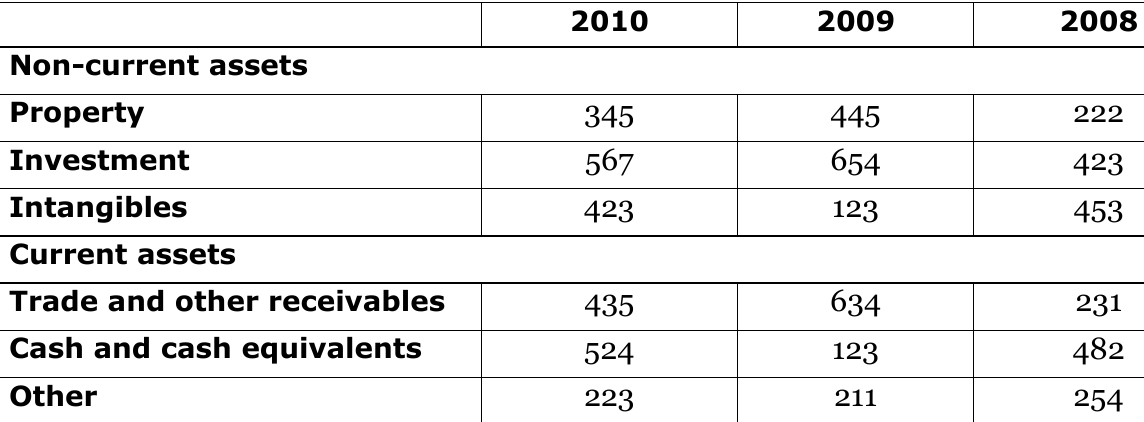

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Non-current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Property
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
 <tr>
  <td>
   Current
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Tradeand
  </td>
  <td>
   other
  </td>
  <td>



Processing: table_5_page2.png


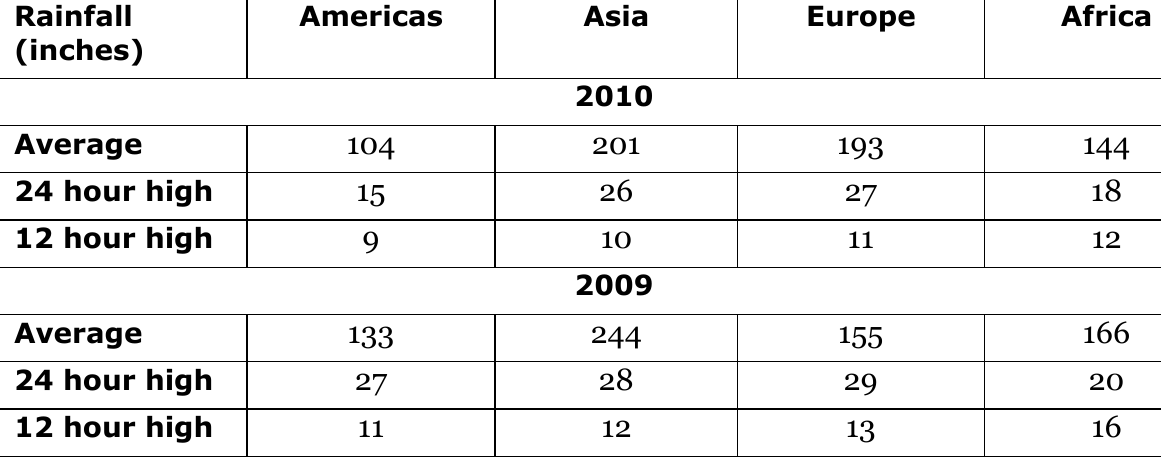

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Rainfall
  </td>
  <td>
  </td>
  <td>
   Americas
  </td>
  <td>
   Asia
  </td>
  <td>
   Europe
  </td>
  <td>
   Africa
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   (inches)
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Average
  </td>
  <td>
  </td>
  <td>
   104
  </td>
  <td>
   201
  </td>
  <td>
   193
  </td>
  <td>
   144
  </td>
 </tr>
 <tr>
  <td>
   24
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   15
  </td>
  <td>
   26
  </td>
  <td>
   27
  </td>
  <td>
   18
  </td>
 </tr>
 <tr>
  <td>
   12
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   9
  </td>
  <td>
   10
  </td>
  <td>
   11
  </td>
  <td>
   12
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>



Processing: table_6_page2.png


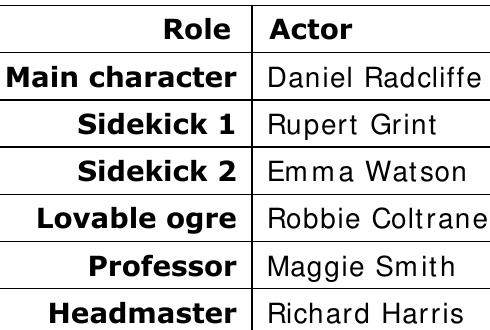

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Role
  </td>
  <td>
   Actor
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Main
  </td>
  <td>
  </td>
  <td>
   character
  </td>
  <td>
  </td>
  <td>
   Daniel
  </td>
  <td>
   Radcliffe
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   1
  </td>
  <td>
   Rupert
  </td>
  <td>
   Grint
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   2
  </td>
  <td>
   Emma
  </td>
  <td>
   Watson
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Lovable
  </td>
  <td>
  </td>
  <td>
   ogre
  </td>
  <td>
   Robbie
  </td>
  <td>
   Coltrane
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Professor
  </td>
  <td>
  </td>
  <td>
   Maggie
  </td>
  <td>
   Smith
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Headmaster
  </td>
  <td>
  </td>
  <td>
   Richard
  </td>
  <td>
   Harris



Processing: table_7_page3.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Trade
  </td>
  <td>
   and
  </td>
  <td>
   other
  </td>
  <td>
   receivables
  </td>
  <td>
   435
  </td>
  <td>
   634
  </td>
  <td>
   231
  </td>
 </tr>
 <tr>
  <td>
   Cash
  </td>
  <td>
   and
  </td>
  <td>
   cash
  </td>
  <td>
   equivalents
  </td>
  <td>
   524
  </td>
  <td>
   123
  </td>
  <td>
   482
  </td>
 </tr>
 <tr>
  <td>
   Other
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   223
  </td>
  <td>
   211
  </td>
  <td>
   254
  </td>
 </tr>
</table>




Processing: table_8_page3.png


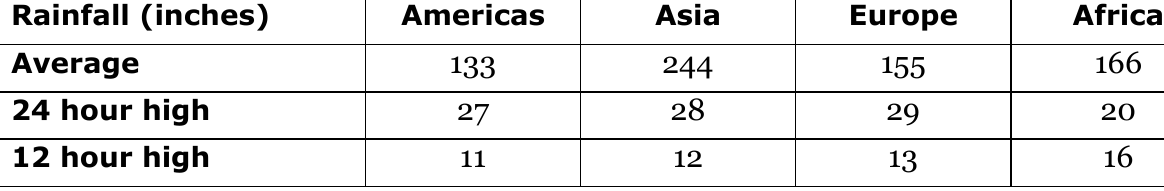

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Rainfall
  </td>
  <td>
   (inches)
  </td>
  <td>
   Americas
  </td>
  <td>
   Asia
  </td>
  <td>
   Europe
  </td>
  <td>
   Africa
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Average
  </td>
  <td>
  </td>
  <td>
   133
  </td>
  <td>
   244
  </td>
  <td>
   155
  </td>
  <td>
   166
  </td>
 </tr>
 <tr>
  <td>
   24
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   27
  </td>
  <td>
   28
  </td>
  <td>
   29
  </td>
  <td>
   20
  </td>
 </tr>
 <tr>
  <td>
   12
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   11
  </td>
  <td>
   12
  </td>
  <td>
   13
  </td>
  <td>
   16
  </td>
 </tr>
</table>




Processing: table_9_page3.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Non-current
  </td>
  <td>
   assets
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Property
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
</table>



In [9]:
import os
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import Image as displayImage, display, HTML
from bs4 import BeautifulSoup as bs
import pytesseract
import numpy as np
from sklearn.cluster import DBSCAN

# === Core Functions ===

def get_ocr_data(img):
    data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    boxes = []
    for i in range(len(data['text'])):
        text = data['text'][i].strip()
        if text == '':
            continue
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        boxes.append({'text': text, 'x': x, 'y': y, 'w': w, 'h': h})
    return boxes

def cluster_rows(boxes, eps=20):
    if not boxes:
        return []
    y_centers = np.array([[b['y'] + b['h'] // 2] for b in boxes])
    db = DBSCAN(eps=eps, min_samples=1).fit(y_centers)
    rows = {}
    for label, box in zip(db.labels_, boxes):
        rows.setdefault(label, []).append(box)
    return [sorted(row, key=lambda b: b['x']) for row in sorted(rows.values(), key=lambda r: np.mean([b['y'] for b in r]))]

def build_table_with_positions(img):
    boxes = get_ocr_data(img)
    rows = cluster_rows(boxes, eps=20)

    # Estimate number of columns
    col_positions = []
    for row in rows:
        for b in row:
            col_positions.append((b['x'], b['x'] + b['w']))

    col_centers = np.array([[np.mean(pos)] for pos in col_positions])
    if len(col_centers) == 0:
        return []

    db = DBSCAN(eps=30, min_samples=1).fit(col_centers)
    col_clusters = sorted(set(db.labels_))
    col_edges = []
    for c in col_clusters:
        members = col_centers[db.labels_ == c]
        center = np.mean(members)
        col_edges.append(center)

    col_edges = sorted(col_edges)
    table = []

    for row in rows:
        r = [''] * len(col_edges)
        for box in row:
            center = box['x'] + box['w'] // 2
            idx = np.argmin([abs(center - e) for e in col_edges])
            r[idx] += (' ' + box['text']).strip()
        table.append(r)
    return table

def table_to_html(grid):
    html = "<table border='1' style='border-collapse: collapse;'>\n"
    for row in grid:
        html += "  <tr>\n"
        for cell in row:
            html += f"    <td>{cell}</td>\n"
        html += "  </tr>\n"
    html += "</table>"
    return bs(html, "html.parser").prettify()

# === Execution ===

image_folder = "/kaggle/working/croped"
image_files = sorted(glob(os.path.join(image_folder, "*.png")))

for path in image_files:
    print(f"\nProcessing: {os.path.basename(path)}")
    
    # Show image
    display(displayImage(path))

    # Load image and extract table
    img = Image.open(path)
    grid = build_table_with_positions(img)
    html = table_to_html(grid)

    # Print and display HTML
    print(html)
    display(HTML(html))



Processing: table_10_page4.png


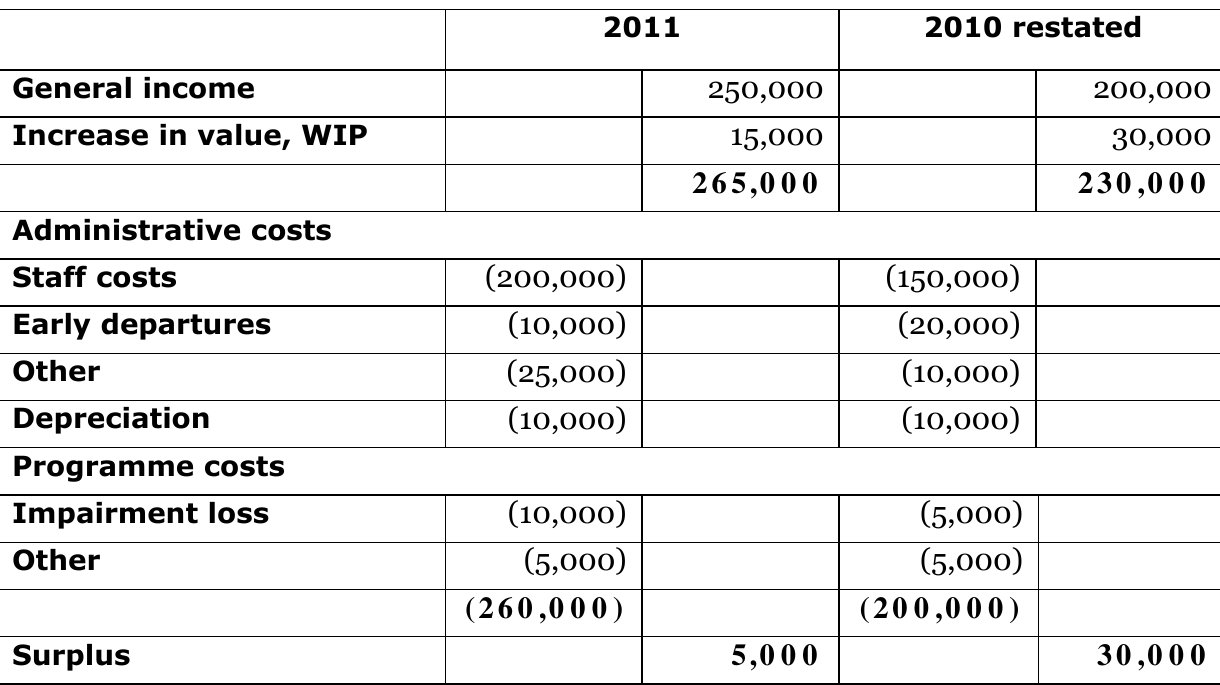

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   restated
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   250,000
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
   Increase
  </td>
  <td>
   in
  </td>
  <td>
   value,
  </td>
  <td>
  </td>
  <td>
   WIP
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   15,000
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   265,000
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
   Administrative
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   costs
 

Saved JSON table to: /kaggle/working/tables_json/table_10_page4.json

Processing: table_11_page4.png


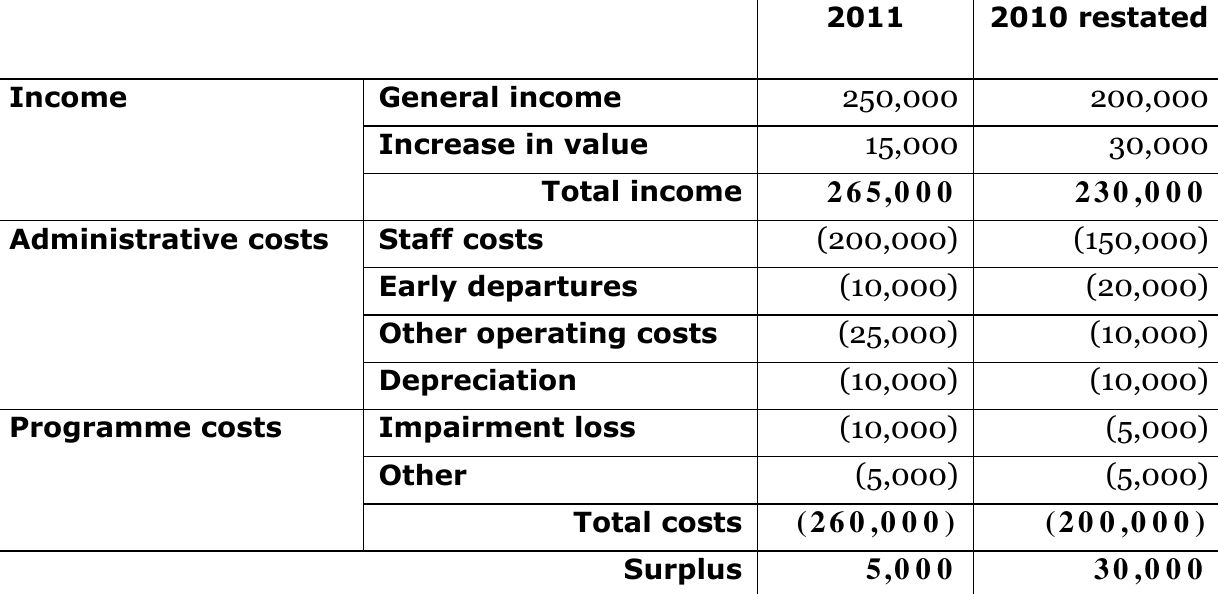

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
  <td>
   2010
  </td>
  <td>
   restated
  </td>
 </tr>
 <tr>
  <td>
   Income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
   250,000
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Increase
  </td>
  <td>
   invalue
  </td>
  <td>
  </td>
  <td>
   15,000
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Total
  </td>
  <td>
   income
  </td>
  <td>
   265,000
  </td>
  <td>
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Administrative
  </td>
  <td>
  </td>


Saved JSON table to: /kaggle/working/tables_json/table_11_page4.json

Processing: table_12_page5.png


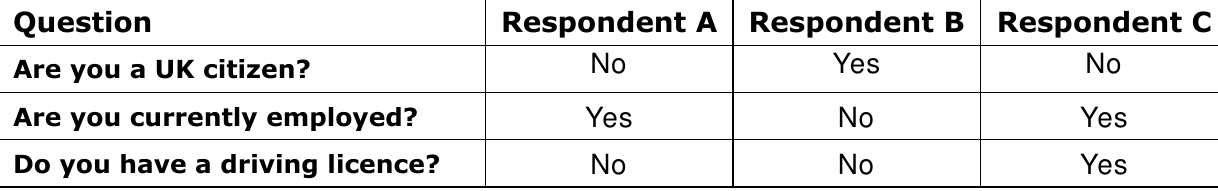

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Question
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Respondent
  </td>
  <td>
   A|
  </td>
  <td>
   Respondent
  </td>
  <td>
   B|
  </td>
  <td>
   Respondent
  </td>
  <td>
   C
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   aUK
  </td>
  <td>
   citizen?
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   currently
  </td>
  <td>
  </td>
  <td>
   employed?
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Do
  </td>
  <td>
   you
  </td>
  <td>
   havea
  </td>
  <td>
   driving
  </td>
  <td>
  </td>
  <td>
   licence?
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>


Saved JSON table to: /kaggle/working/tables_json/table_12_page5.json

Processing: table_13_page5.png


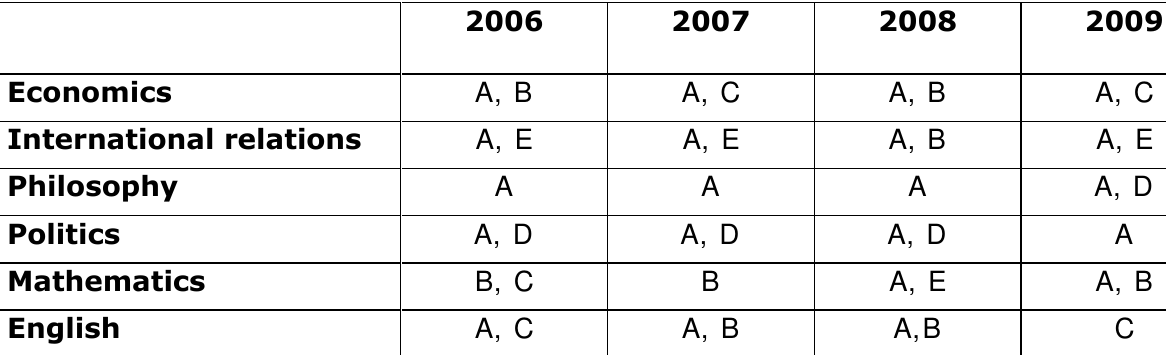

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2006
  </td>
  <td>
   2007
  </td>
  <td>
   2008
  </td>
  <td>
   2009
  </td>
 </tr>
 <tr>
  <td>
   Economics
  </td>
  <td>
  </td>
  <td>
   A,B
  </td>
  <td>
   A,C
  </td>
  <td>
   A,B
  </td>
  <td>
   A,C
  </td>
 </tr>
 <tr>
  <td>
   International
  </td>
  <td>
   relations
  </td>
  <td>
   A,E
  </td>
  <td>
   A,E
  </td>
  <td>
   A,B
  </td>
  <td>
   A,E
  </td>
 </tr>
 <tr>
  <td>
   Philosophy
  </td>
  <td>
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A,D
  </td>
 </tr>
 <tr>
  <td>
   Politics
  </td>
  <td>
  </td>
  <td>
   A,D
  </td>
  <td>
   A,D
  </td>
  <td>
   A,D
  </td>
  <td>
   A
  </td>
 </tr>
 <tr>
  <td>
   Mathematics
  </td>
  <td>
  </td>
  <td>
   B,C
  </td>
  <td>
   B
  </td>
  <td>
   A,E
  </td>
  <td>
   A,B
  </td>
 </tr>
 <tr>
  <td>
   English
  </td>
  <td>
  </td>
  <td>
   A,C
  </td>
  <td>
   A,B

Saved JSON table to: /kaggle/working/tables_json/table_13_page5.json

Processing: table_14_page5.png


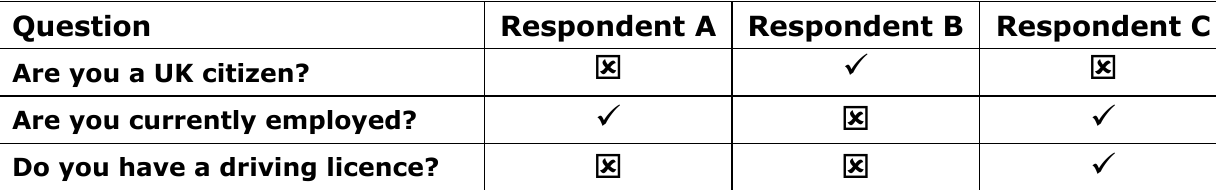

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Question
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Respondent
  </td>
  <td>
   A|
  </td>
  <td>
   Respondent
  </td>
  <td>
   B|
  </td>
  <td>
   Respondent
  </td>
  <td>
   C
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   aUK
  </td>
  <td>
   citizen?
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   v
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Are
  </td>
  <td>
   you
  </td>
  <td>
   currently
  </td>
  <td>
  </td>
  <td>
   employed?
  </td>
  <td>
  </td>
  <td>
   v
  </td>
  <td>
  </td>
  <td>
   [x]
  </td>
  <td>
  </td>
  <td>
   v
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Do
  </td>
  <td>
   you
  </td>
  <td>
   havea
  </td>
  <td>
   driving
  </td>
  <td>
  </td>
  <td>
   licence?
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   [x]
  </td>
  <td>
 

Saved JSON table to: /kaggle/working/tables_json/table_14_page5.json

Processing: table_15_page5.png


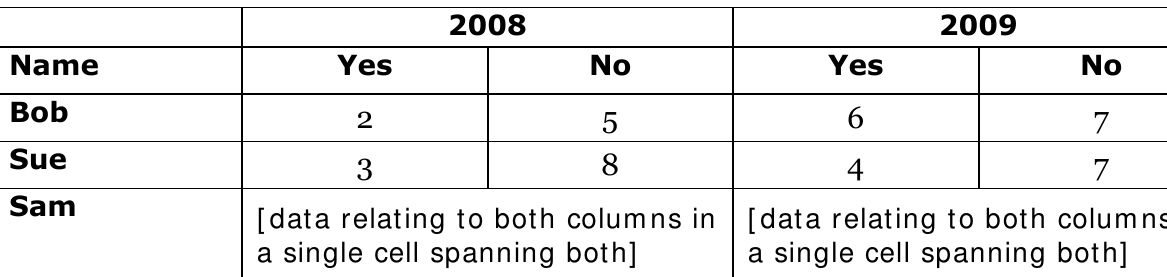

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2008
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Name
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
  </td>
  <td>
   2
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   5
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   6
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   7
  </td>
 </tr>
 <tr>
  <td>
   Sue
  </td>
  <td>
  </td>
  <td>
   3
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   8
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   4
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   7
  </td>
 </tr>
 <tr>
  <td>
   Sam
  </td>
  <td>
   [data
  </td>
  <td>
   relating

Saved JSON table to: /kaggle/working/tables_json/table_15_page5.json

Processing: table_16_page6.png


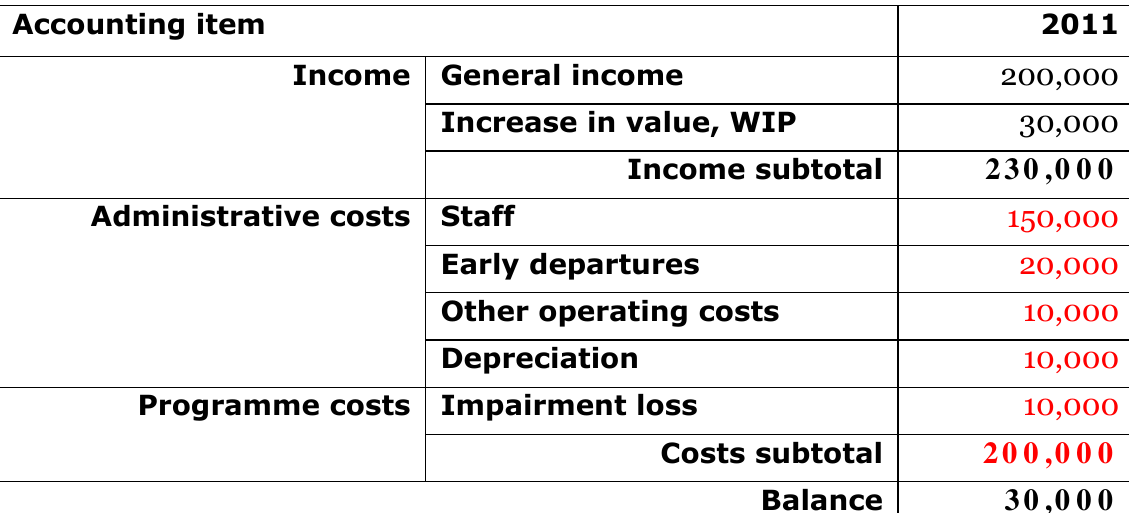

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Accounting
  </td>
  <td>
   item
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
   |
  </td>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Increase
  </td>
  <td>
   in
  </td>
  <td>
   value,
  </td>
  <td>
   WIP
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
  </td>
  <td>
   subtotal
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Administrative
  </td>
  <td>
   costs
  </td>
  <td>
   |
  </td>
  <td>
   Staff
  </td>
  <td>
  </td>
  

Saved JSON table to: /kaggle/working/tables_json/table_16_page6.json

Processing: table_17_page6.png


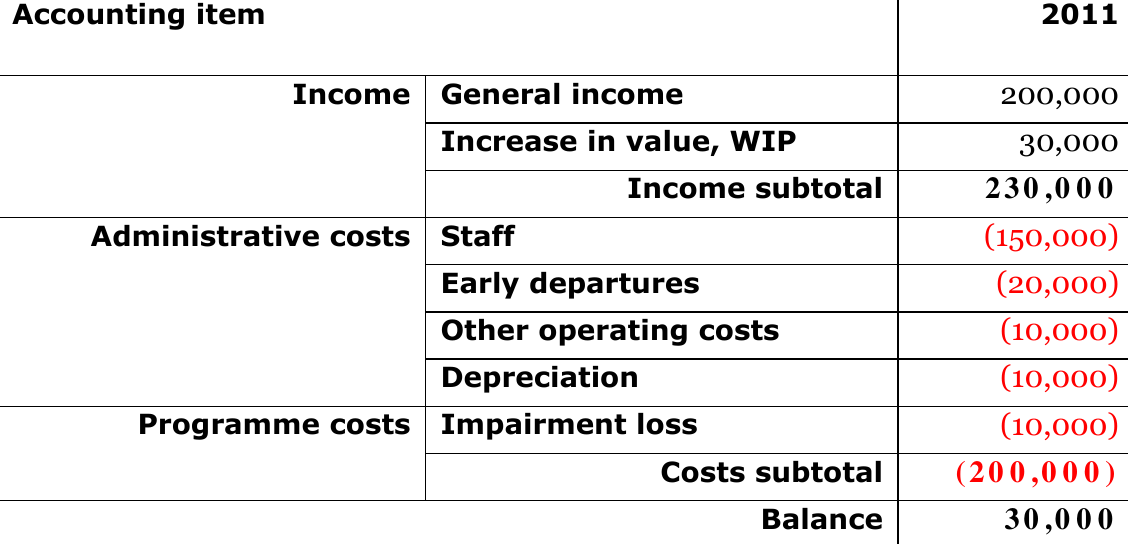

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Accounting
  </td>
  <td>
   item
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2011
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
   |
  </td>
  <td>
   General
  </td>
  <td>
   income
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   200,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Increase
  </td>
  <td>
   in
  </td>
  <td>
   value,
  </td>
  <td>
   WIP
  </td>
  <td>
  </td>
  <td>
   30,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Income
  </td>
  <td>
  </td>
  <td>
   subtotal
  </td>
  <td>
   230,000
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Administrative
  </td>
  <td>
   costs
  </td>
  <td>
   |
  </td>
  <td>
   Staff
  </td>
  <td>
  </td>
  

Saved JSON table to: /kaggle/working/tables_json/table_17_page6.json

Processing: table_18_page6.png


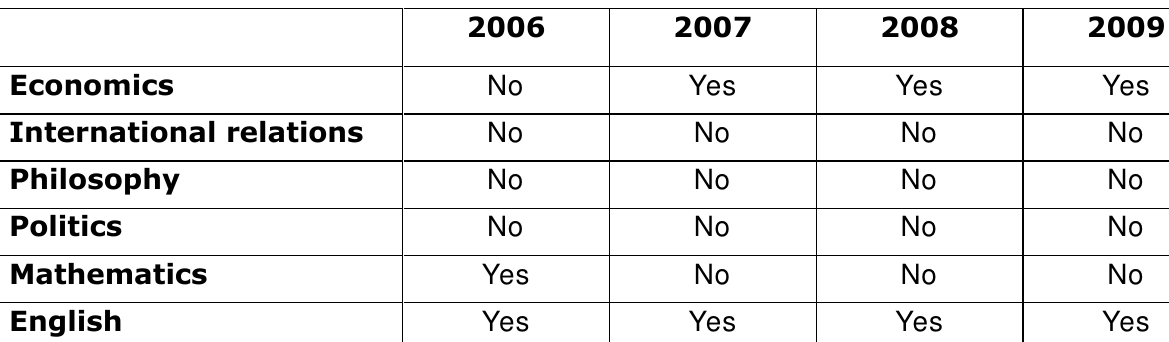

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2006
  </td>
  <td>
   2007
  </td>
  <td>
   2008
  </td>
  <td>
   2009
  </td>
 </tr>
 <tr>
  <td>
   Economics
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
   Yes
  </td>
  <td>
   Yes
  </td>
  <td>
   Yes
  </td>
 </tr>
 <tr>
  <td>
   International
  </td>
  <td>
   relations
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Philosophy
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Politics
  </td>
  <td>
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   Mathematics
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
  <td>
   No
  </td>
 </tr>
 <tr>
  <td>
   English
  </td>
  <td>
  </td>
  <td>
   Yes
  </td>
  <td>
   Yes
  </t

Saved JSON table to: /kaggle/working/tables_json/table_18_page6.json

Processing: table_19_page7.png


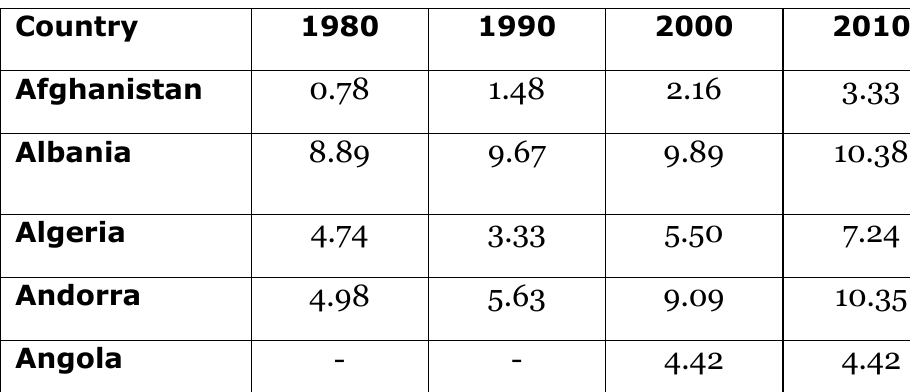

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Country
  </td>
  <td>
   1980
  </td>
  <td>
   1990
  </td>
  <td>
   2000
  </td>
  <td>
   2010
  </td>
 </tr>
 <tr>
  <td>
   Afghanistan
  </td>
  <td>
   0.78
  </td>
  <td>
   1.48
  </td>
  <td>
   2.16
  </td>
  <td>
   3.33
  </td>
 </tr>
 <tr>
  <td>
   Albania
  </td>
  <td>
   8.89
  </td>
  <td>
   9.67
  </td>
  <td>
   9.89
  </td>
  <td>
   10.38
  </td>
 </tr>
 <tr>
  <td>
   Algeria
  </td>
  <td>
   4.74
  </td>
  <td>
   3.33,
  </td>
  <td>
   5.50
  </td>
  <td>
   7.24
  </td>
 </tr>
 <tr>
  <td>
   Andorra
  </td>
  <td>
   4.98
  </td>
  <td>
   5.63
  </td>
  <td>
   9.09
  </td>
  <td>
   10.35
  </td>
 </tr>
 <tr>
  <td>
   Angola
  </td>
  <td>
   -
  </td>
  <td>
   -
  </td>
  <td>
   4.42
  </td>
  <td>
   4.42
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_19_page7.json

Processing: table_1_page1.png


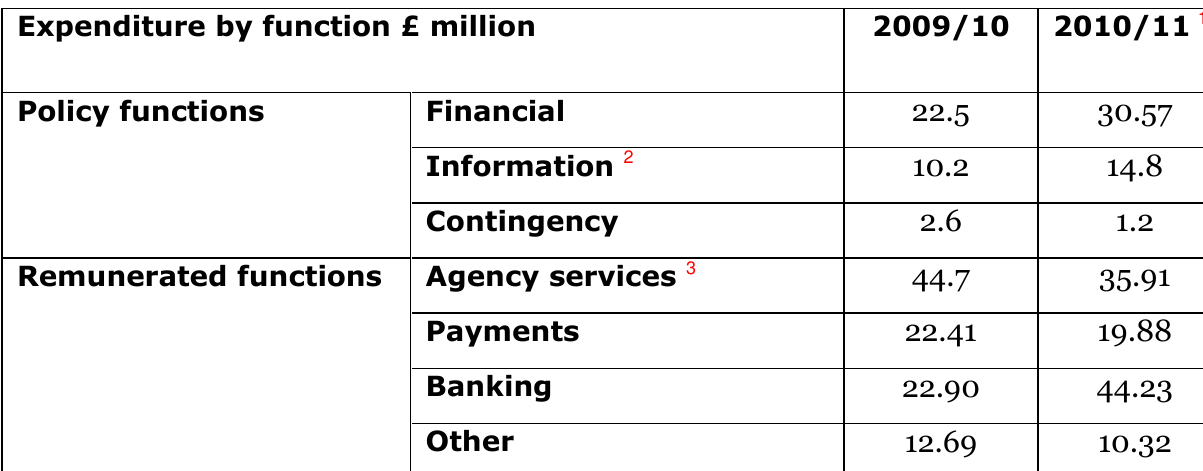

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Expenditure
  </td>
  <td>
  </td>
  <td>
   by
  </td>
  <td>
   function
  </td>
  <td>
   £
  </td>
  <td>
   million
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009/10
  </td>
  <td>
   |
  </td>
  <td>
   2010/11
  </td>
 </tr>
 <tr>
  <td>
   Policy
  </td>
  <td>
  </td>
  <td>
   functions
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Financial
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   22.5
  </td>
  <td>
  </td>
  <td>
   30.57
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Information
  </td>
  <td>
   *
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
  </td>
  <td>
  

Saved JSON table to: /kaggle/working/tables_json/table_1_page1.json

Processing: table_20_page7.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Expenditure
  </td>
  <td>
  </td>
  <td>
   by
  </td>
  <td>
   function
  </td>
  <td>
  </td>
  <td>
   £million
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009/10
  </td>
  <td>
   |
  </td>
  <td>
   2010/11
  </td>
 </tr>
 <tr>
  <td>
   Policy
  </td>
  <td>
  </td>
  <td>
   functions
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Financial
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   22.5
  </td>
  <td>
  </td>
  <td>
   30.57
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Information
  </td>
  <td>
   *
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
  </td>
  <td>
   1.2

Saved JSON table to: /kaggle/working/tables_json/table_20_page7.json

Processing: table_21_page8.png


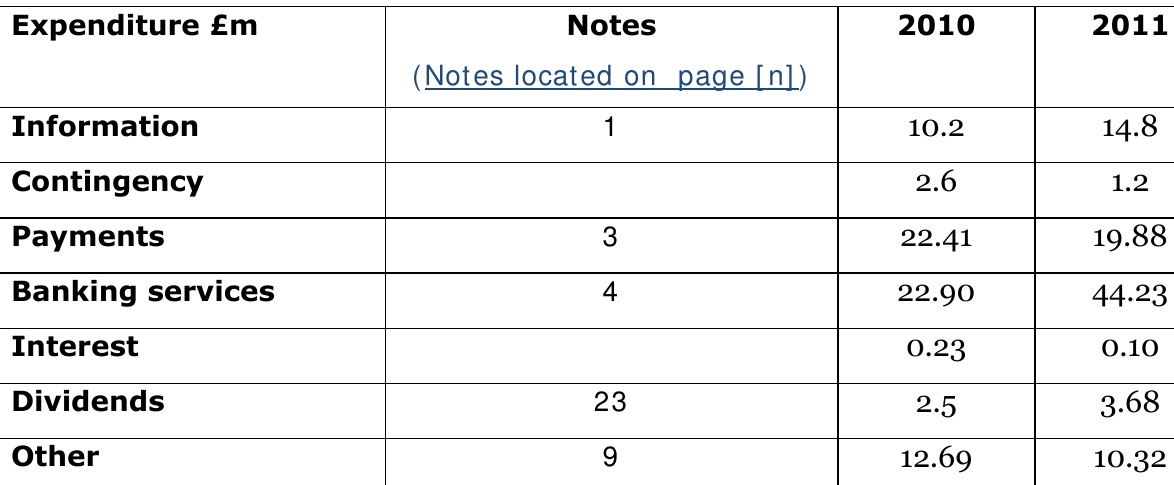

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Expenditure
  </td>
  <td>
   £m
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Notes
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2011
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   (Notes
  </td>
  <td>
   located
  </td>
  <td>
   on
  </td>
  <td>
   page
  </td>
  <td>
   [n])
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Information
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   1
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
   1.2
  </td>
 </tr>
 <tr>
  <td>
   Payments
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   3
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   22.41
  </td>
  <td>
   19.88
  </td>
 </tr>
 <tr>
  <td>
   B

Saved JSON table to: /kaggle/working/tables_json/table_21_page8.json

Processing: table_22_page8.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2008
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Name
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Completed
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Completed
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
   22
  </td>
  <td>
  </td>
  <td>
   21
  </td>
  <td>
   20
  </td>
  <td>
  </td>
  <td>
   19
  </td>
 </tr>
 <tr>
  <td>
   Sue
  </td>
  <td>
   44
  </td>
  <td>
  </td>
  <td>
   12
  </td>
  <td>
   12
  </td>
  <td>
  </td>
  <td>
   10
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_22_page8.json

Processing: table_23_page8.png


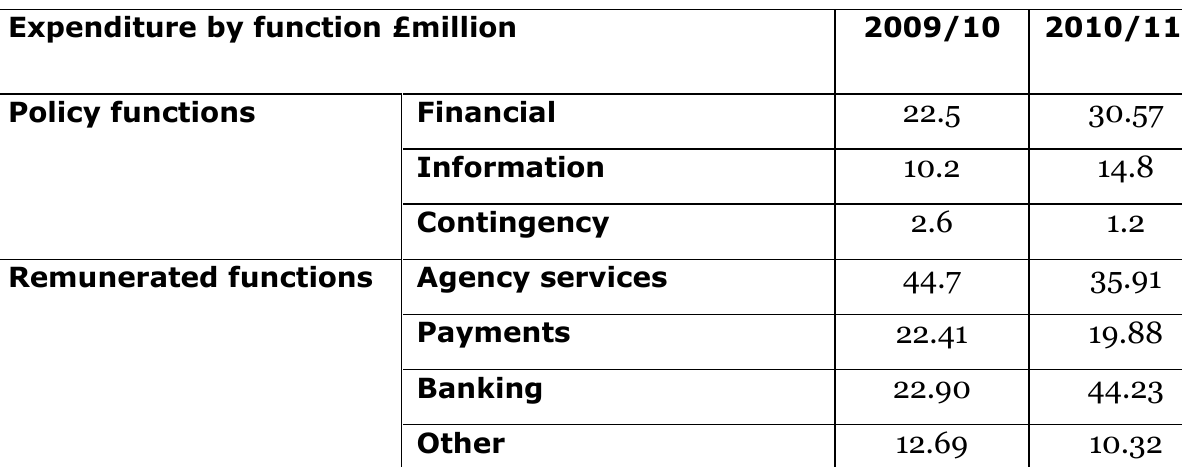

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Expenditure
  </td>
  <td>
  </td>
  <td>
   by
  </td>
  <td>
   function
  </td>
  <td>
  </td>
  <td>
   £million
  </td>
  <td>
  </td>
  <td>
   2009/10
  </td>
  <td>
   |
  </td>
  <td>
   2010/11
  </td>
 </tr>
 <tr>
  <td>
   Policy
  </td>
  <td>
  </td>
  <td>
   functions
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Financial
  </td>
  <td>
  </td>
  <td>
   22.5
  </td>
  <td>
  </td>
  <td>
   30.57
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Information
  </td>
  <td>
  </td>
  <td>
   10.2
  </td>
  <td>
  </td>
  <td>
   14.8
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Contingency
  </td>
  <td>
  </td>
  <td>
   2.6
  </td>
  <td>
  </td>
  <td>
   1.2
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Remunerated
  </td

Saved JSON table to: /kaggle/working/tables_json/table_23_page8.json

Processing: table_24_page9.png


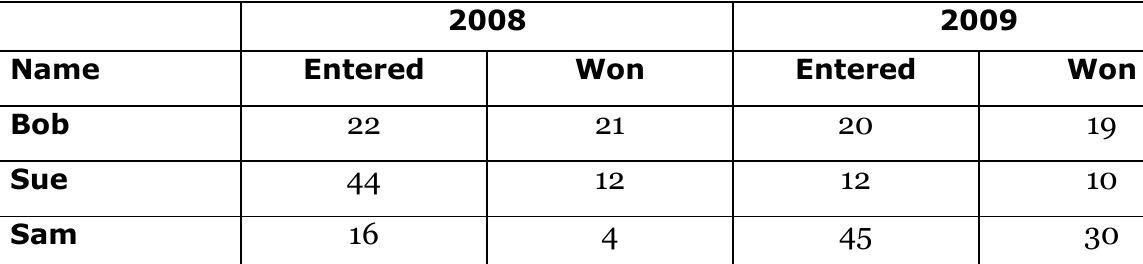

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2008
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2009
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Name
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Won
  </td>
  <td>
   Entered
  </td>
  <td>
  </td>
  <td>
   Won
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
   22
  </td>
  <td>
  </td>
  <td>
   21
  </td>
  <td>
   20
  </td>
  <td>
  </td>
  <td>
   19
  </td>
 </tr>
 <tr>
  <td>
   Sue
  </td>
  <td>
   44
  </td>
  <td>
  </td>
  <td>
   12
  </td>
  <td>
   12
  </td>
  <td>
  </td>
  <td>
   10
  </td>
 </tr>
 <tr>
  <td>
   Sam
  </td>
  <td>
   16
  </td>
  <td>
  </td>
  <td>
   4
  </td>
  <td>
   45
  </td>
  <td>
  </td>
  <td>
   30
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_24_page9.json

Processing: table_25_page9.png


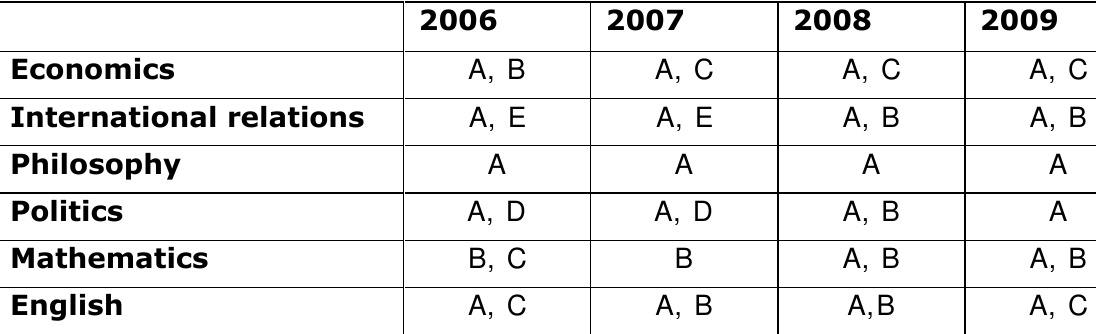

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   2006
  </td>
  <td>
   2007
  </td>
  <td>
   2008
  </td>
  <td>
   2009
  </td>
 </tr>
 <tr>
  <td>
   Economics
  </td>
  <td>
  </td>
  <td>
   A,B
  </td>
  <td>
   A,C
  </td>
  <td>
   A,C
  </td>
  <td>
   A,C
  </td>
 </tr>
 <tr>
  <td>
   International
  </td>
  <td>
   relations
  </td>
  <td>
   AVE
  </td>
  <td>
   A,E
  </td>
  <td>
   A,B
  </td>
  <td>
   A,B
  </td>
 </tr>
 <tr>
  <td>
   Philosophy
  </td>
  <td>
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
  <td>
   A
  </td>
 </tr>
 <tr>
  <td>
   Politics
  </td>
  <td>
  </td>
  <td>
   A,D
  </td>
  <td>
   A,D
  </td>
  <td>
   A,B
  </td>
  <td>
   A
  </td>
 </tr>
 <tr>
  <td>
   Mathematics
  </td>
  <td>
  </td>
  <td>
   B,C
  </td>
  <td>
   B
  </td>
  <td>
   A,B
  </td>
  <td>
   A,B
  </td>
 </tr>
 <tr>
  <td>
   English
  </td>
  <td>
  </td>
  <td>
   A,C
  </td>
  <td>
   A,B
 

Saved JSON table to: /kaggle/working/tables_json/table_25_page9.json

Processing: table_26_page9.png


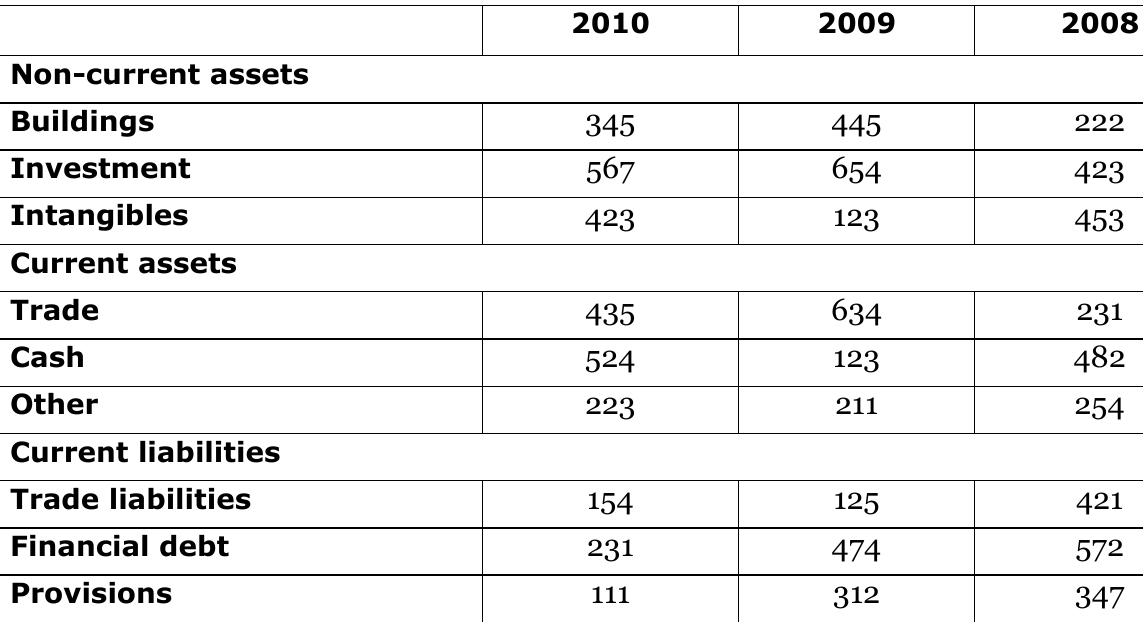

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Non-current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Buildings
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
 <tr>
  <td>
   Current
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Trade
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   435
  </td>
  <td>
   634
  </td>
  <td>
   231
  </td>
 </tr>
 <tr>
  <td>
   Cash

Saved JSON table to: /kaggle/working/tables_json/table_26_page9.json

Processing: table_27_page10.png


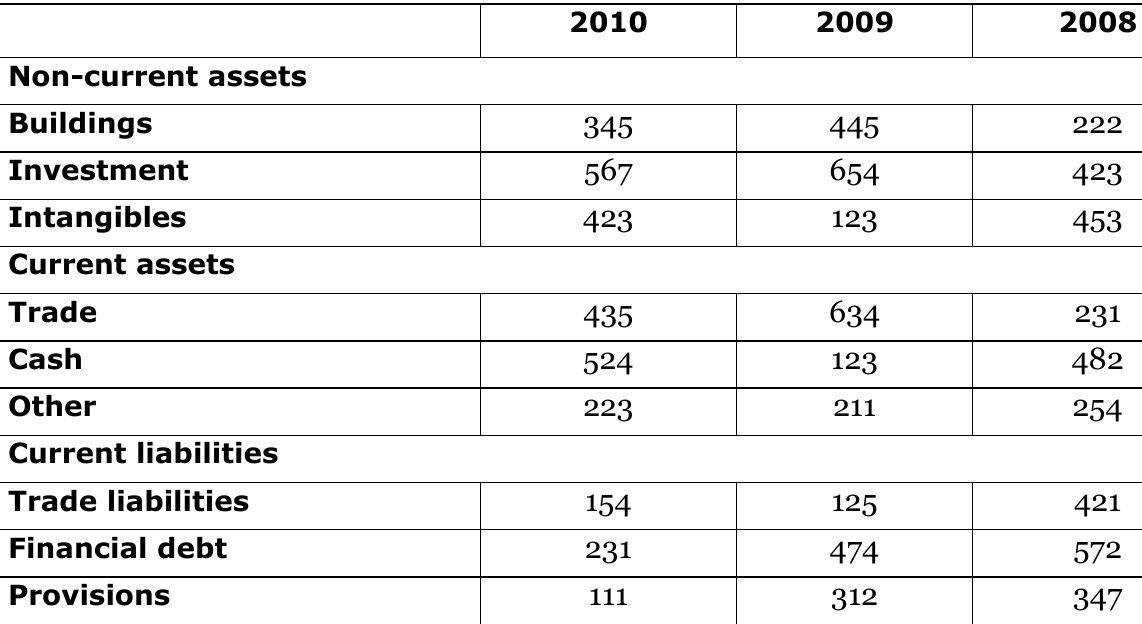

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Non-current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Buildings
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
 <tr>
  <td>
   Current
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Trade
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   435
  </td>
  <td>
   634
  </td>
  <td>
   231
  </td>
 </tr>
 <tr>
  <td>
   Cash

Saved JSON table to: /kaggle/working/tables_json/table_27_page10.json

Processing: table_28_page10.png


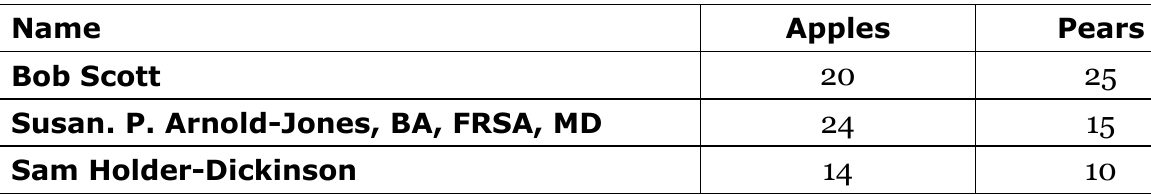

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Name
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Apples
  </td>
  <td>
   Pears
  </td>
 </tr>
 <tr>
  <td>
   Bob
  </td>
  <td>
   Scott
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   20
  </td>
  <td>
   25
  </td>
 </tr>
 <tr>
  <td>
   Susan.
  </td>
  <td>
   P.
  </td>
  <td>
  </td>
  <td>
   Arnold-Jones,
  </td>
  <td>
   BA,
  </td>
  <td>
   FRSA,
  </td>
  <td>
   MD
  </td>
  <td>
   24
  </td>
  <td>
   15
  </td>
 </tr>
 <tr>
  <td>
   Sam
  </td>
  <td>
  </td>
  <td>
   Holder-Dickinson
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   14
  </td>
  <td>
   10
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_28_page10.json

Processing: table_29_page11.png


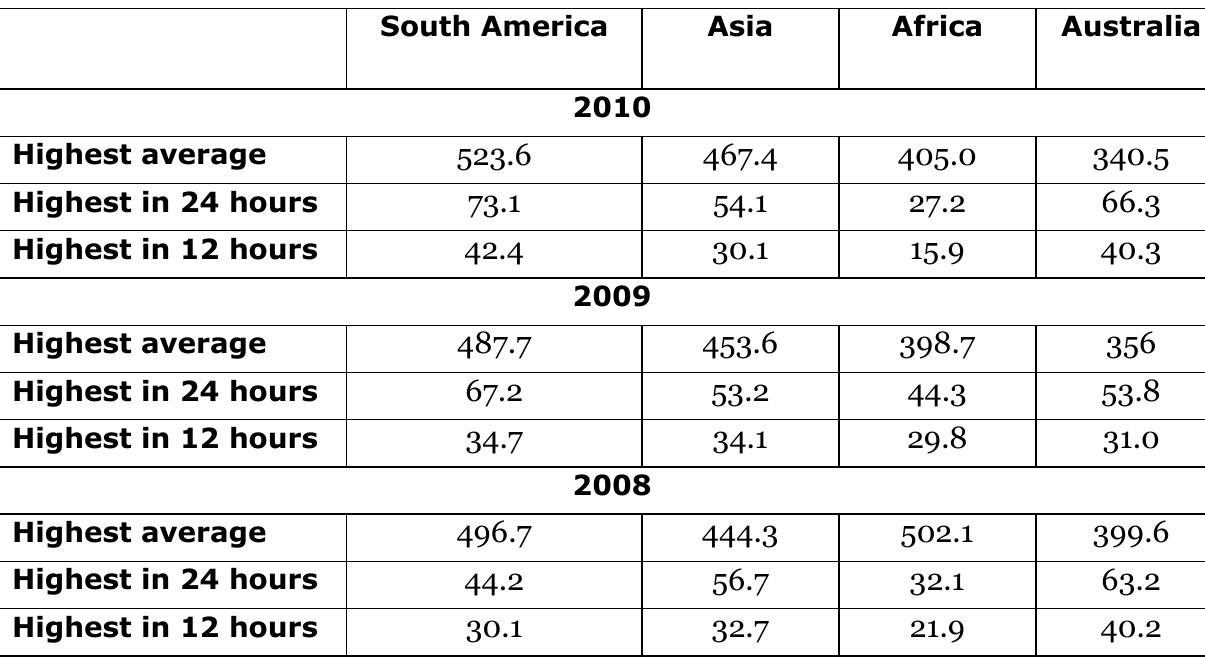

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   South
  </td>
  <td>
  </td>
  <td>
   America
  </td>
  <td>
  </td>
  <td>
   Asia
  </td>
  <td>
   Africa
  </td>
  <td>
   Australia
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Highest
  </td>
  <td>
  </td>
  <td>
   average
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   523.6
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   467.4
  </td>
  <td>
   405.0
  </td>
  <td>
   340.5
  </td>
 </tr>
 <tr>
  <td>
   Highest
  </td>
  <td>
   in
  </td>
  <td>
   24
  </td>
  <td>
   hours
  </td>
  <td>
  </td>
  <td>
   73.1
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   54.1
  </td>
  <td>
   27.2
  </td>
  <td>
   66.3
  </td>
 </tr>
 <tr>
  <td>
   Highest
  </td>
  <td>
   in
  </td>


Saved JSON table to: /kaggle/working/tables_json/table_29_page11.json

Processing: table_2_page1.png


<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Main
  </td>
  <td>
  </td>
  <td>
   character
  </td>
  <td>
  </td>
  <td>
   Daniel
  </td>
  <td>
   Radcliffe
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   1
  </td>
  <td>
   Rupert
  </td>
  <td>
   Grint
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   2
  </td>
  <td>
   Emma
  </td>
  <td>
   Watson
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Lovable
  </td>
  <td>
  </td>
  <td>
   ogre
  </td>
  <td>
   Robbie
  </td>
  <td>
   Coltrane
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Professor
  </td>
  <td>
  </td>
  <td>
   Maggie
  </td>
  <td>
   Smith
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Headmaster
  </td>
  <td>
  </td>
  <td>
   Richard
  </td>
  <td>
   Harris
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_2_page1.json

Processing: table_3_page1.png


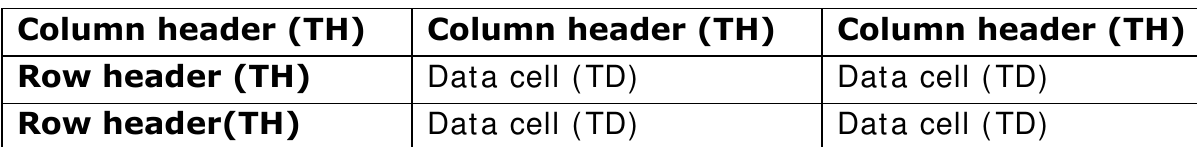

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Column
  </td>
  <td>
  </td>
  <td>
   header
  </td>
  <td>
  </td>
  <td>
   (TH)
  </td>
  <td>
   Column
  </td>
  <td>
  </td>
  <td>
   header
  </td>
  <td>
   (TH)
  </td>
  <td>
   Column
  </td>
  <td>
  </td>
  <td>
   header
  </td>
  <td>
   (TH)
  </td>
 </tr>
 <tr>
  <td>
   Row
  </td>
  <td>
   header
  </td>
  <td>
  </td>
  <td>
   (TH)
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Row
  </td>
  <td>
  </td>
  <td>
   header(TH)
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
  <td>
   Data
  </td>
  <td>
   cell
  </td>
  <td>
   (TD)
  </td>
  <td>
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_3_page1.json

Processing: table_4_page2.png


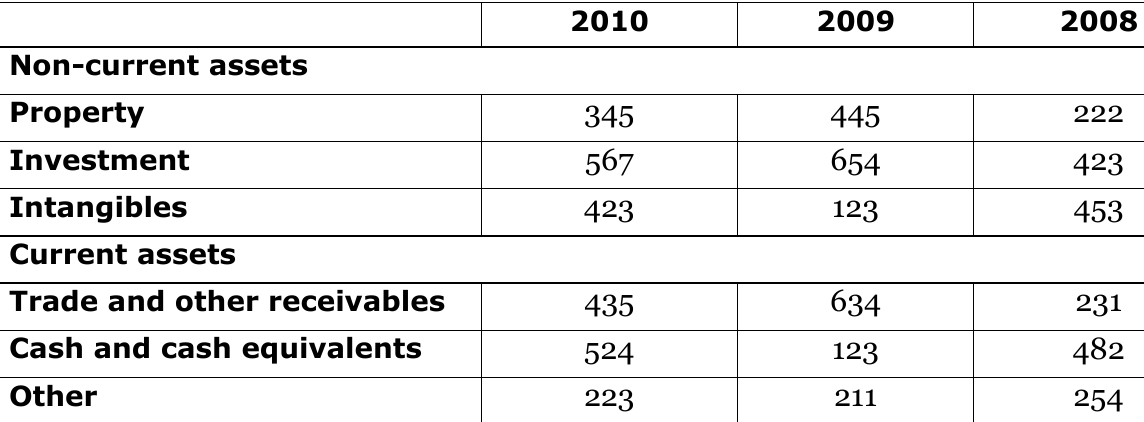

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Non-current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Property
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
 <tr>
  <td>
   Current
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Tradeand
  </td>
  <td>
   other
  </td>
  <td>


Saved JSON table to: /kaggle/working/tables_json/table_4_page2.json

Processing: table_5_page2.png


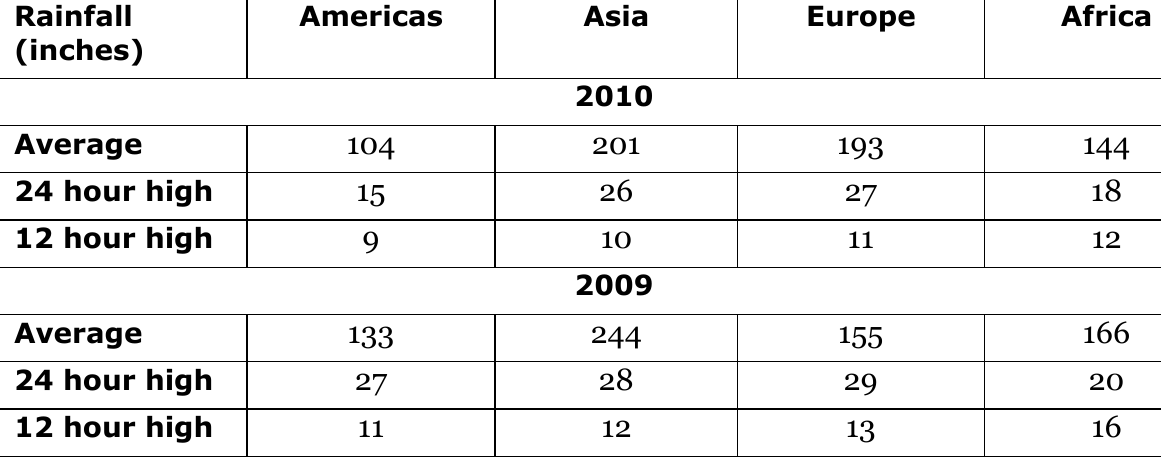

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Rainfall
  </td>
  <td>
  </td>
  <td>
   Americas
  </td>
  <td>
   Asia
  </td>
  <td>
   Europe
  </td>
  <td>
   Africa
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   (inches)
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Average
  </td>
  <td>
  </td>
  <td>
   104
  </td>
  <td>
   201
  </td>
  <td>
   193
  </td>
  <td>
   144
  </td>
 </tr>
 <tr>
  <td>
   24
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   15
  </td>
  <td>
   26
  </td>
  <td>
   27
  </td>
  <td>
   18
  </td>
 </tr>
 <tr>
  <td>
   12
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   9
  </td>
  <td>
   10
  </td>
  <td>
   11
  </td>
  <td>
   12
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>


Saved JSON table to: /kaggle/working/tables_json/table_5_page2.json

Processing: table_6_page2.png


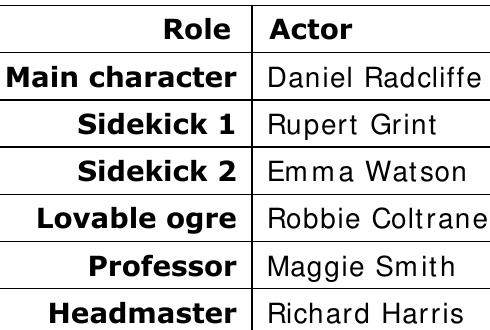

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   Role
  </td>
  <td>
   Actor
  </td>
  <td>
  </td>
 </tr>
 <tr>
  <td>
   Main
  </td>
  <td>
  </td>
  <td>
   character
  </td>
  <td>
  </td>
  <td>
   Daniel
  </td>
  <td>
   Radcliffe
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   1
  </td>
  <td>
   Rupert
  </td>
  <td>
   Grint
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Sidekick
  </td>
  <td>
   2
  </td>
  <td>
   Emma
  </td>
  <td>
   Watson
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Lovable
  </td>
  <td>
  </td>
  <td>
   ogre
  </td>
  <td>
   Robbie
  </td>
  <td>
   Coltrane
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Professor
  </td>
  <td>
  </td>
  <td>
   Maggie
  </td>
  <td>
   Smith
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
  </td>
  <td>
   Headmaster
  </td>
  <td>
  </td>
  <td>
   Richard
  </td>
  <td>
   Harris


Saved JSON table to: /kaggle/working/tables_json/table_6_page2.json

Processing: table_7_page3.png


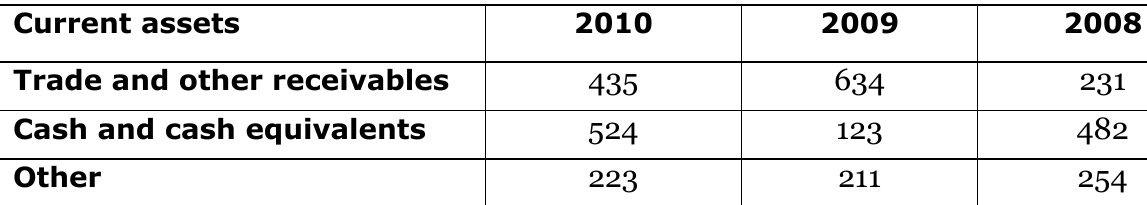

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Current
  </td>
  <td>
  </td>
  <td>
   assets
  </td>
  <td>
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Trade
  </td>
  <td>
   and
  </td>
  <td>
   other
  </td>
  <td>
   receivables
  </td>
  <td>
   435
  </td>
  <td>
   634
  </td>
  <td>
   231
  </td>
 </tr>
 <tr>
  <td>
   Cash
  </td>
  <td>
   and
  </td>
  <td>
   cash
  </td>
  <td>
   equivalents
  </td>
  <td>
   524
  </td>
  <td>
   123
  </td>
  <td>
   482
  </td>
 </tr>
 <tr>
  <td>
   Other
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
  </td>
  <td>
   223
  </td>
  <td>
   211
  </td>
  <td>
   254
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_7_page3.json

Processing: table_8_page3.png


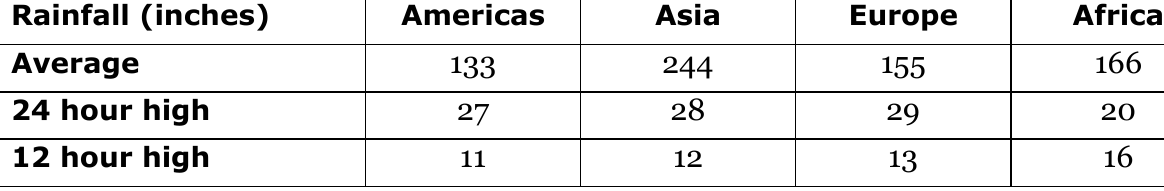

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
  </td>
  <td>
   Rainfall
  </td>
  <td>
   (inches)
  </td>
  <td>
   Americas
  </td>
  <td>
   Asia
  </td>
  <td>
   Europe
  </td>
  <td>
   Africa
  </td>
 </tr>
 <tr>
  <td>
  </td>
  <td>
   Average
  </td>
  <td>
  </td>
  <td>
   133
  </td>
  <td>
   244
  </td>
  <td>
   155
  </td>
  <td>
   166
  </td>
 </tr>
 <tr>
  <td>
   24
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   27
  </td>
  <td>
   28
  </td>
  <td>
   29
  </td>
  <td>
   20
  </td>
 </tr>
 <tr>
  <td>
   12
  </td>
  <td>
   hour
  </td>
  <td>
   high
  </td>
  <td>
   11
  </td>
  <td>
   12
  </td>
  <td>
   13
  </td>
  <td>
   16
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_8_page3.json

Processing: table_9_page3.png


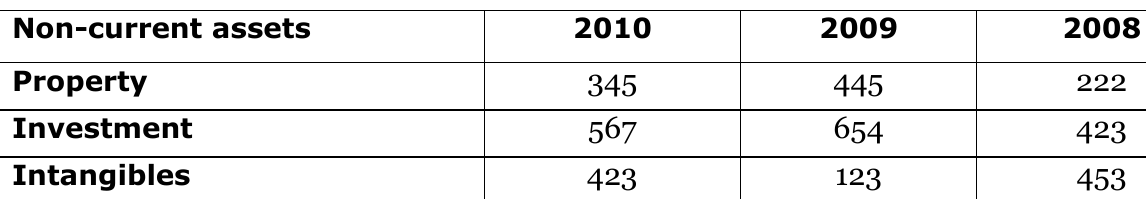

<table border="1" style="border-collapse: collapse;">
 <tr>
  <td>
   Non-current
  </td>
  <td>
   assets
  </td>
  <td>
   2010
  </td>
  <td>
   2009
  </td>
  <td>
   2008
  </td>
 </tr>
 <tr>
  <td>
   Property
  </td>
  <td>
  </td>
  <td>
   345
  </td>
  <td>
   445
  </td>
  <td>
   222
  </td>
 </tr>
 <tr>
  <td>
   Investment
  </td>
  <td>
  </td>
  <td>
   567
  </td>
  <td>
   654
  </td>
  <td>
   423
  </td>
 </tr>
 <tr>
  <td>
   Intangibles
  </td>
  <td>
  </td>
  <td>
   423
  </td>
  <td>
   123
  </td>
  <td>
   453
  </td>
 </tr>
</table>



Saved JSON table to: /kaggle/working/tables_json/table_9_page3.json


In [10]:
import json

# === Execution ===

image_folder = "/kaggle/working/croped"
output_folder = "/kaggle/working/tables_json"
os.makedirs(output_folder, exist_ok=True)

image_files = sorted(glob(os.path.join(image_folder, "*.png")))

for path in image_files:
    filename = os.path.basename(path)
    name, _ = os.path.splitext(filename)

    print(f"\nProcessing: {filename}")
    
    # Show image
    display(displayImage(path))

    # Load image and extract table
    img = Image.open(path)
    grid = build_table_with_positions(img)

    # Convert to HTML and display
    html = table_to_html(grid)
    print(html)
    display(HTML(html))

    # Save table as JSON file (2D list)
    json_path = os.path.join(output_folder, f"{name}.json")
    with open(json_path, "w") as f:
        json.dump(grid, f, indent=2)

    print(f"Saved JSON table to: {json_path}")

TAPAS models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version. Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.
Device set to use cuda:0


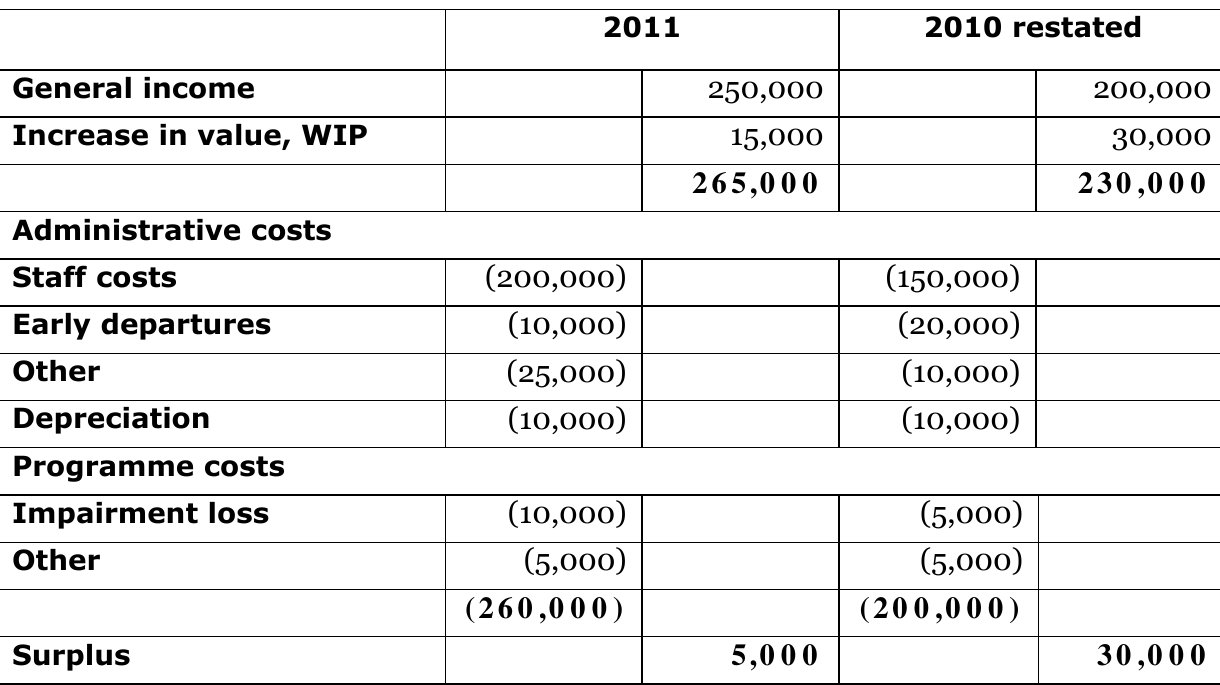

/usr/local/lib/python3.11/dist-packages/transformers/models/tapas/tokenization_tapas.py:2699: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
/usr/local/lib/python3.11/dist-packages/transformers/models/tapas/tokenization_tapas.py:1493: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]


In [27]:
import pandas as pd
from transformers import pipeline
from IPython.display import display, HTML, Image as displayImage

# Initialize the pipeline for table-based question answering
pipe = pipeline("table-question-answering", model="google/tapas-large-finetuned-wtq")

class TapasQAWithPipeline:
    def __init__(self):
        pass
    
    def ask(self, table: pd.DataFrame, questions: list[str]):
        table.columns = table.columns.map(str)  # Ensure all columns are strings
        table = table.astype(str)  # Convert all cell values to string
        
        # Process each question
        results = []
        for question in questions:
            # Use the pipeline to get an answer
            answer = pipe(table=table, query=question)
            
            # Display the question and answer
            results.append((question, answer['answer']))
            display(HTML(f"<b>Question:</b> {question}<br><b>Answer:</b> {answer['answer']}<hr>"))
        
        return results



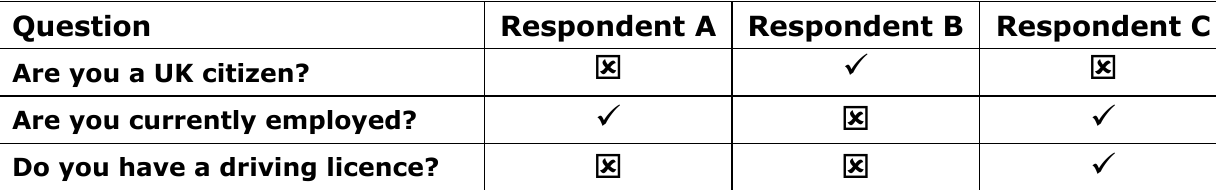

/usr/local/lib/python3.11/dist-packages/transformers/models/tapas/tokenization_tapas.py:2699: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
/usr/local/lib/python3.11/dist-packages/transformers/models/tapas/tokenization_tapas.py:1493: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]


In [33]:
# Paths
json_path = "/kaggle/working/tables_json/table_14_page5.json"
image_path = "/kaggle/working/croped/table_14_page5.png"

# Display table image
display(displayImage(image_path))

# Load table from JSON
table = pd.read_json(json_path)

# Create the TapasQAWithPipeline instance
qa_system = TapasQAWithPipeline()

# Questions to ask
questions = [
    "Are you a UK citizen?"
]

# Run QA
results = qa_system.ask(table, questions)